# CM3005 Data Science Midterm Coursework
# Prediction of Future Median Resale Prices - Yearly & Town specific 

## Introduction 

For this project, I aimed to look into the housing market in Singapore, particularly the resale market. The resale market comprises of previous owners and occupants, selling their properties across Singapore. The prices of these flats are dependent on the type of flat - 1 room, 2 room, 3 room, 4 room, Executive Condominium as well as the location of the home itself. 

The Housing & Development Board (**HDB**) oversees the process of selling a flat. Flat owners, who wish to sell their flats, will have to register an Intent to Sell and might be able to grant an Option to Purchase (**OTP**) to potential buyers. Thereafter, both parties - sellers and buyers will have to sumbmit their respective portions of tthe resale applications. [1]

**Objectives**

1. Collecting relevant datasets which contribute to the resale prices across Singapore

2. Exploratory Data Analysis of the multiple datasets and the First Normal Form dataframe

3. Multiple Linear Regression to predict the future yearly median and town specific median price

I believe that the linear regression model will be beneficial to those who are looking to purchase homes or wish to better understand the housing market in Singapore. They might be better able to plan their expenses or look into purchasing homes in different towns after looking at the price difference and the prediction of the future. 

The results of this project will be able to identify and highlight the different factors that play a part towards the change in resale prices. In addition, it will be able to give us an overall idea on how the much of an impact the different factors are to the yearly median prices of the resale flats. 

## Dataset Description

In this project, I have used datasets which are in the Comma Separated Value type. I had acquired all datasets from the Department of Statistics Singapore [2] and the Singapore Open Data [3].
There is a total of six datasets that I have utilised in this project. Each dataset contains  factors I believed have been and will be instrumental in the prediction of future resale prices of housing flats. 

**Dataset 1: indicators_of_population.csv - population_df**

This dataset was sourced from the Singapore Department of Statistics. This dataset is a Comma Separated Value (CSV) file. I read the file into Jupyter enviroment by using pandas to read the file and convert it into a dataframe. This dataframe had data from the Year 1950 to 2023. However, in order to ensure the consistency across all dataframes used in the project, I dropped columns of data during the pre-processing stage. 

**Dataset 2: gdp_yearly.csv - gdp_df**

This dataset was sourced from the Singapore Department of Statistics. It was a CSV file with several rows of data about the GDP across  different sectors that contribute to the economy. To ensure consistency, I dropped rows of data prior to 2007. Thereafter, I looked at which sectors which have the biggest impact and contribution to the housing and resale market. 

**Dataset 3: average_median_income.csv - household_income_df**

This dataset was sourced from the Singapore Department of Statistics. It was a CSV file with information pertaining to the median and average earning across resident household and resident employed households. The data on household income is based on the Annual June Comprehensive Labour Force Surveys conducted by the Ministry of Manpower. 

**Dataset 4: resale_transactions.csv - transaction_df** 

This dataset was sourced from the Singapore Department of Statistics. It was a CSV file which had data categorised yearly by each type of flat and how many resale transactions went through. During the pre-processing stage, I restructurd the dateframe and cleaned up the dataframe so that all the data from a particlar years is in a singualr column. I removed the data pertaining to the flat type HUDC, as they have since been privatised and therefore, will no longer be of value to the project. [4]

**Dataset 5: MedianResalePricesforRegisteredApplicationsbyTownandFlatType.csv - price_df** 

This dataset was sourced from the Singapore Open Data. It was a CSV file with information categorised by the quarters in each year documenting the tyope of flat which was sold and the median price it was sold for in the town. 
To ensure consistency across all the dataframes, I removed the quarter from each year and viewed it as data from the year instead. Thereafter, removed the rows with missing price values. Therafter, I restructured the dataframe and got 2 different dataframes from this dataset - median_price_yearly and town_yearly_median_df. 

**Dataset 6: Applicationsregisteredforresaleflatsandrentalflats.csv - application_df** 

This dataset was sourced from Singapore Open Data. It was a CSV file which had data about the number of rental and resale flat applciations which had been registered for a specific year. However, since I decided that the scope of this project would be on resale flats, I removed all the rows which were pertaining to the rental flats. 

## Data Preparation Exploratory Data Analysing & Pre-Processing

### DataFrame Preparation: population_df
Source: Singapore Department of Statistics

In this dataframe, I analysed all the factors of the population and chose to focus on particular indicators which would best capture the state of the population. 

In [1]:
# Importing relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Reading the csv file 
# Creating population_df dataframe 
population_df = pd.read_csv('hdb_data/indicators_of_population.csv')

In [3]:
# Looking at the top 5 rows of data from the population_df
population_df.head(75)

,Data Series,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Sex Ratio,...,Old-Age Support Ratio:Citizens Aged 15-64 Years Per Citizen Aged 65 Years & Over,Age Dependency Ratio:Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years,Child Dependency Ratio:Citizens Aged Under 15 Years Per Hundred Citizens Aged 15-64 Years,Old-Age Dependency Ratio:Citizens Aged 65 Years & Over Per Hundred Citizens Aged 15-64 Years,Old-Age Support Ratio:Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over,Age Dependency Ratio:Citizens Aged Under 20 Years And 65 Years & Over Per Hundred Citizens Aged 20-64 Years,Child Dependency Ratio:Citizens Aged Under 20 Years Per Hundred Citizens Aged 20-64 Years,Old-Age Dependency Ratio:Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years,Resident Natural Increase,Rate Of Natural Increase
0,2023,5917648,4149253,3610658,538595,1768395,5.0,1.9,8058,950,...,3.5,51.1,22.3,28.9,3.2,63.9,32.6,31.3,na,na
1,2022,5637022,4073239,3553749,519490,1563783,3.4,2.2,7688,955,...,3.6,50,22.4,27.6,3.3,62.7,32.8,29.9,6704,1.6
2,2021,5453566,3986842,3498191,488651,1466724,-4.1,-1.4,7485,960,...,3.8,48.7,22.5,26.2,3.5,61.4,33,28.5,10913,2.7
3,2020,5685807,4044210,3523191,521019,1641597,-0.3,0.4,7810,957,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,13248,3.3
4,2019,5703569,4026209,3500940,525269,1677360,1.2,0.8,7866,957,...,4.3,45.2,22,23.2,4,58.4,33.1,25.3,15042,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1954,1248200,na,na,na,na,4.7,na,na,1138,...,na,na,na,na,na,na,na,na,46239,37.1
70,1953,1191800,na,na,na,na,5.7,na,na,1149,...,na,na,na,na,na,na,na,na,42992,36.1
71,1952,1127000,na,na,na,na,5.5,na,na,1153,...,na,na,na,na,na,na,na,na,39136,34.7
72,1951,1068100,na,na,na,na,4.5,na,na,1159,...,na,na,na,na,na,na,na,na,35735,33.4


In [4]:
# Dropping entire columns that might not be relevant to the objectives of the project
population_df.drop(population_df.columns[9:], axis=1, inplace = True)

In [5]:
# Dropping values from the years prior to 2007
# I wanted to keep the years consistent across all dataframes
population_df.drop(population_df.index[17:], axis=0, inplace = True)

In [6]:
# Renamed the column from data series to year
population_df.rename(columns={'Data Series': 'Year'}, inplace = True)

In [7]:
#looking at the population_df again to check if the name has been changed
population_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density
0,2023,5917648,4149253,3610658,538595,1768395,5.0,1.9,8058
1,2022,5637022,4073239,3553749,519490,1563783,3.4,2.2,7688
2,2021,5453566,3986842,3498191,488651,1466724,-4.1,-1.4,7485
3,2020,5685807,4044210,3523191,521019,1641597,-0.3,0.4,7810
4,2019,5703569,4026209,3500940,525269,1677360,1.2,0.8,7866
5,2018,5638676,3994283,3471936,522347,1644393,0.5,0.7,7804
6,2017,5612253,3965796,3439177,526619,1646457,0.1,0.8,7796
7,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697
9,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615


In [8]:
# Switching the order of the year and the structure of the dataframe itself
population_df = population_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
population_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797


In [9]:
population_df.columns

Index(['Year', 'Total Population ', 'Resident Population ',
       'Singapore Citizen Population ', 'Permanent Resident Population ',
       'Non-Resident Population ', 'Total Population Growth ',
       'Resident Population Growth ', 'Population Density '],
      dtype='object')

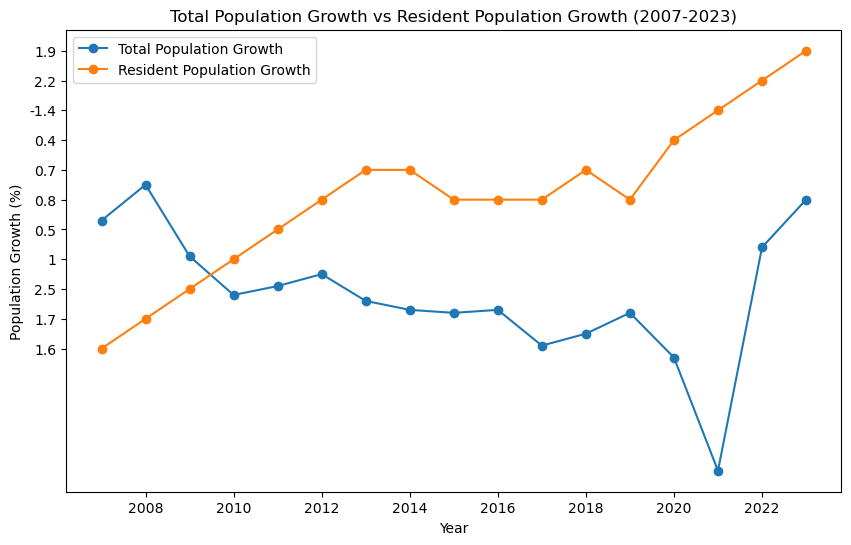

In [10]:
# Plotting the data as a line graph
plt.figure(figsize=(10, 6))

# Plotting lines
plt.plot(population_df['Year'], population_df['Total Population Growth '], marker='o', label='Total Population Growth')
plt.plot(population_df['Year'], population_df['Resident Population Growth '], marker='o', label='Resident Population Growth')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.title('Total Population Growth vs Resident Population Growth (2007-2023)')

# Adding legend to the plot
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Total Population Growth vs Resident Population Growth (2007-2023) Graph**

From the line plot, we can see that there has been a steady increase in the resident population growth, however the total popualtion growth has been on a decline. However, we can see that both the total population growth and the resident population growth took a dip as it was during the Covid19 Pandemic which affected the growth of population. This shows us that there is a ever present and continuous need for housing options for residents as the resident population growth is most likely to increase. 

### DataFrame Preparation: gdp_df
Source: Singapore Department of Statistics 

During the pre-processing stage for this dataframe, I removed data for the years prior to 2007 and focused on particular sectors which directly impact the housing sector in Singapore. In addition, I restructured the dataframe, so that the structure is most compatible in order to be merged with other dataframes.

In [11]:
# Reading in the gdp_yearly csv file 
# Creating a gdp_df which stores relevant values across different sectors
gdp_df = pd.read_csv('hdb_data/gdp_yearly.csv')
gdp_df

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,GDP At Current Market Prices,643545.8,569364.2,480691.2,514066.0,508337.4,474034.1,440754.7,423444.1,398947.9,...,5081.3,4364.4,3789.9,3356.4,2983.6,2737.2,2809,2529.3,2340.7,2157.4
1,Goods Producing Industries,155642.0,138899.6,112345.3,123787.0,129201.3,111601.0,102541.5,102984.3,96557.6,...,1396.4,1174.6,985.4,856.1,752.5,672.9,618.8,535.8,476.9,432.8
2,Manufacturing,131932.6,118345.6,94957.7,99693.7,105388.5,88021.9,77026.9,76598.2,71809.7,...,821.9,659.3,547.8,473,403.9,350.7,328.5,271.4,241.1,228.2
3,Construction,16796.9,14142.2,11012.7,18054.7,17833.6,17935.1,19760.3,20430.8,19179.9,...,285.4,247.4,203.1,176.7,176.6,150.5,127.6,104.4,93.6,67.7
4,Utilities,6731.6,6232.6,6216.8,5873.1,5826.0,5498.1,5615.1,5817.2,5430.2,...,146.2,134.8,119.1,96.6,80.4,80.5,71.4,69.2,60,57
5,Other Goods Industries,180.9,179.2,158.1,165.5,153.2,145.9,139.2,138.1,137.8,...,142.9,133.1,115.4,109.8,91.6,91.2,91.3,90.8,82.2,79.9
6,Services Producing Industries,436069.1,381222.5,327389.5,345882.5,334807.1,316123.1,294041.4,278103.0,262844.0,...,3296.5,2865.7,2517.2,2220.5,1980.7,1848.9,1984.1,1792.1,1671.4,1538.7
7,Wholesale & Retail Trade,121645.8,107801.2,88967.5,91367.6,89122.5,82138.1,74169.9,65584.5,64724.5,...,1259.1,1066.2,941.2,795.5,665.6,634.9,795.6,685.4,652.9,601.5
8,Wholesale Trade,113921.9,100892.2,82773.3,83803.7,81180.2,74360.3,66578.2,58306.1,57829.3,...,na,na,na,na,na,na,na,na,na,na
9,Retail Trade,7723.9,6909.0,6194.2,7563.9,7942.3,7777.8,7591.7,7278.4,6895.2,...,na,na,na,na,na,na,na,na,na,na


In [12]:
# Dropping entire columns and saving the dataframe
gdp_df.drop(gdp_df.columns[17:], axis=1, inplace = True)

# Making changes to the structure of the gdp_df
# Name change to transposed_df
transposed_df = gdp_df.transpose()

# Set the first row as the header
transposed_df.columns = transposed_df.iloc[0]

# Drop the first row (which is now the header)
transposed_df = transposed_df[1:]

# Reset the index of transposed_df
transposed_df = transposed_df.reset_index()

# Rename the 'index' column to 'Year' in the transposed_df
transposed_df = transposed_df.rename(columns={'index': 'Year'})

# Display the transposed DataFrame transposed_df
transposed_df

Data Series,Year,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale & Retail Trade,Wholesale Trade,...,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services",Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add:Taxes On Products
0,2022,643545.8,155642.0,131932.6,16796.9,6731.6,180.9,436069.1,121645.8,113921.9,...,33111.9,82394.2,68880.9,17676.6,32778.4,18425.9,57149.8,19904.4,611615.5,31930.3
1,2021,569364.2,138899.6,118345.6,14142.2,6232.6,179.2,381222.5,107801.2,100892.2,...,29564.2,74308.8,61550.7,15515.1,29372.6,16663.0,53030.8,18912.9,539035.0,30329.2
2,2020,480691.2,112345.3,94957.7,11012.7,6216.8,158.1,327389.5,88967.5,82773.3,...,25723.9,69816.3,58982.8,13610.1,27230.7,18142.0,48526.1,18785.1,458519.9,22171.3
3,2019,514066.0,123787.0,99693.7,18054.7,5873.1,165.5,345882.5,91367.6,83803.7,...,22789.0,68145.6,68023.6,16836.7,29555.2,21631.7,54118.0,18453.0,488122.5,25943.5
4,2018,508337.4,129201.3,105388.5,17833.6,5826.0,153.2,334807.1,89122.5,81180.2,...,20329.1,62480.8,69681.2,16337.3,26931.7,26412.2,52529.1,17751.0,481759.4,26578.0
5,2017,474034.1,111601.0,88021.9,17935.1,5498.1,145.9,316123.1,82138.1,74360.3,...,19142.1,56785.7,66738.7,15686.6,25911.9,25140.2,50380.0,17436.2,445160.3,28873.8
6,2016,440754.7,102541.5,77026.9,19760.3,5615.1,139.2,294041.4,74169.9,66578.2,...,18169.9,51598.8,65653.0,17410.3,24933.6,23309.1,47521.2,17589.4,414172.3,26582.4
7,2015,423444.1,102984.3,76598.2,20430.8,5817.2,138.1,278103.0,65584.5,58306.1,...,16227.4,49872.2,62666.4,18781.5,24218.6,19666.3,44974.4,18100.1,399187.4,24256.7
8,2014,398947.9,96557.6,71809.7,19179.9,5430.2,137.8,262844.0,64724.5,57829.3,...,16196.1,45966.4,57533.0,18962.7,22104.8,16465.5,42665.0,17797.2,377198.8,21749.1
9,2013,384870.3,90356.4,67885.0,17119.7,5219.4,132.3,255092.1,68495.3,61886.9,...,15137.3,42888.3,55306.0,19243.2,21671.4,14391.4,40300.2,17251.0,362699.5,22170.8


In [13]:
# Looking at the transposed_df columns
transposed_df.columns

Index(['Year', 'GDP At Current Market Prices', '  Goods Producing Industries',
       '    Manufacturing', '    Construction', '    Utilities',
       '    Other Goods Industries', '  Services Producing Industries',
       '    Wholesale & Retail Trade', '      Wholesale Trade',
       '      Retail Trade', '    Transportation & Storage',
       '    Accommodation & Food Services', '      Accommodation',
       '      Food & Beverage Services', '    Information & Communications',
       '    Finance & Insurance',
       '    Real Estate, Professional Services And Administrative & Support Services',
       '      Real Estate', '      Professional Services',
       '      Administrative & Support Services',
       '    Other Services Industries', '  Ownership Of Dwellings',
       '  Gross Value Added At Basic Prices', '  Add:Taxes On Products'],
      dtype='object', name='Data Series')

In [14]:
# Displaying the transposed_df
transposed_df

Data Series,Year,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries,Services Producing Industries,Wholesale & Retail Trade,Wholesale Trade,...,Information & Communications,Finance & Insurance,"Real Estate, Professional Services And Administrative & Support Services",Real Estate,Professional Services,Administrative & Support Services,Other Services Industries,Ownership Of Dwellings,Gross Value Added At Basic Prices,Add:Taxes On Products
0,2022,643545.8,155642.0,131932.6,16796.9,6731.6,180.9,436069.1,121645.8,113921.9,...,33111.9,82394.2,68880.9,17676.6,32778.4,18425.9,57149.8,19904.4,611615.5,31930.3
1,2021,569364.2,138899.6,118345.6,14142.2,6232.6,179.2,381222.5,107801.2,100892.2,...,29564.2,74308.8,61550.7,15515.1,29372.6,16663.0,53030.8,18912.9,539035.0,30329.2
2,2020,480691.2,112345.3,94957.7,11012.7,6216.8,158.1,327389.5,88967.5,82773.3,...,25723.9,69816.3,58982.8,13610.1,27230.7,18142.0,48526.1,18785.1,458519.9,22171.3
3,2019,514066.0,123787.0,99693.7,18054.7,5873.1,165.5,345882.5,91367.6,83803.7,...,22789.0,68145.6,68023.6,16836.7,29555.2,21631.7,54118.0,18453.0,488122.5,25943.5
4,2018,508337.4,129201.3,105388.5,17833.6,5826.0,153.2,334807.1,89122.5,81180.2,...,20329.1,62480.8,69681.2,16337.3,26931.7,26412.2,52529.1,17751.0,481759.4,26578.0
5,2017,474034.1,111601.0,88021.9,17935.1,5498.1,145.9,316123.1,82138.1,74360.3,...,19142.1,56785.7,66738.7,15686.6,25911.9,25140.2,50380.0,17436.2,445160.3,28873.8
6,2016,440754.7,102541.5,77026.9,19760.3,5615.1,139.2,294041.4,74169.9,66578.2,...,18169.9,51598.8,65653.0,17410.3,24933.6,23309.1,47521.2,17589.4,414172.3,26582.4
7,2015,423444.1,102984.3,76598.2,20430.8,5817.2,138.1,278103.0,65584.5,58306.1,...,16227.4,49872.2,62666.4,18781.5,24218.6,19666.3,44974.4,18100.1,399187.4,24256.7
8,2014,398947.9,96557.6,71809.7,19179.9,5430.2,137.8,262844.0,64724.5,57829.3,...,16196.1,45966.4,57533.0,18962.7,22104.8,16465.5,42665.0,17797.2,377198.8,21749.1
9,2013,384870.3,90356.4,67885.0,17119.7,5219.4,132.3,255092.1,68495.3,61886.9,...,15137.3,42888.3,55306.0,19243.2,21671.4,14391.4,40300.2,17251.0,362699.5,22170.8


In [15]:
# Remove leading and trailing spaces from column names in transposed_df 
transposed_df.columns = transposed_df.columns.str.strip()

# Specifying columns to drop from transposed_df
# I am dropping multiple columns except ones I believe are directly an impact and result of housing in Singapore
columns_to_drop = [
    'Goods Producing Industries', 'Manufacturing', 'Construction', 'Utilities',
    'Other Goods Industries', 'Services Producing Industries', 'Wholesale & Retail Trade',
    'Wholesale Trade', 'Retail Trade', 'Transportation & Storage', 'Accommodation & Food Services',
    'Accommodation', 'Food & Beverage Services', 'Information & Communications',
    'Finance & Insurance', 'Real Estate, Professional Services And Administrative & Support Services',
    'Professional Services', 'Administrative & Support Services', 'Other Services Industries', 'Add:Taxes On Products', 'Gross Value Added At Basic Prices']

# Drop the specified columns
gdp_df = transposed_df.drop(columns=columns_to_drop, errors='ignore')
gdp_df.columns.name = None

# Print the gdp_df
gdp_df

,Year,GDP At Current Market Prices,Real Estate,Ownership Of Dwellings
0,2022,643545.8,17676.6,19904.4
1,2021,569364.2,15515.1,18912.9
2,2020,480691.2,13610.1,18785.1
3,2019,514066.0,16836.7,18453.0
4,2018,508337.4,16337.3,17751.0
5,2017,474034.1,15686.6,17436.2
6,2016,440754.7,17410.3,17589.4
7,2015,423444.1,18781.5,18100.1
8,2014,398947.9,18962.7,17797.2
9,2013,384870.3,19243.2,17251.0


In [16]:
# Changing the order of the years, 2007 - 2021
# Resetting the index of the gdp_df
gdp_df = gdp_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
gdp_df
 
#Rename columns Real Estate and Ownership Of Dwellings
gdp_df = gdp_df.rename(columns={'Real Estate':'GDP Real Estate'})
gdp_df = gdp_df.rename(columns={'Ownership Of Dwellings':'GDP Ownership Of Dwellings'})
gdp_df

#Drop entire rows for year 2022 to ensure consistency across all dateframes
indices_to_drop = [15]
gdp_df = gdp_df.drop(indices_to_drop)

# Display the DataFrame after dropping rows
print("\nAfter dropping rows:")
print(gdp_df)


After dropping rows:
     Year GDP At Current Market Prices GDP Real Estate  \
0   2007                      272697.6          9360.7   
1   2008                      273941.6         11362.8   
2   2009                      282394.5         11027.5   
3   2010                      326980.1         14034.8   
4   2011                      351367.9         16127.2   
5   2012                      368770.5         17078.0   
6   2013                      384870.3         19243.2   
7   2014                      398947.9         18962.7   
8   2015                      423444.1         18781.5   
9   2016                      440754.7         17410.3   
10  2017                      474034.1         15686.6   
11  2018                      508337.4         16337.3   
12  2019                      514066.0         16836.7   
13  2020                      480691.2         13610.1   
14  2021                      569364.2         15515.1   

   GDP Ownership Of Dwellings  
0                

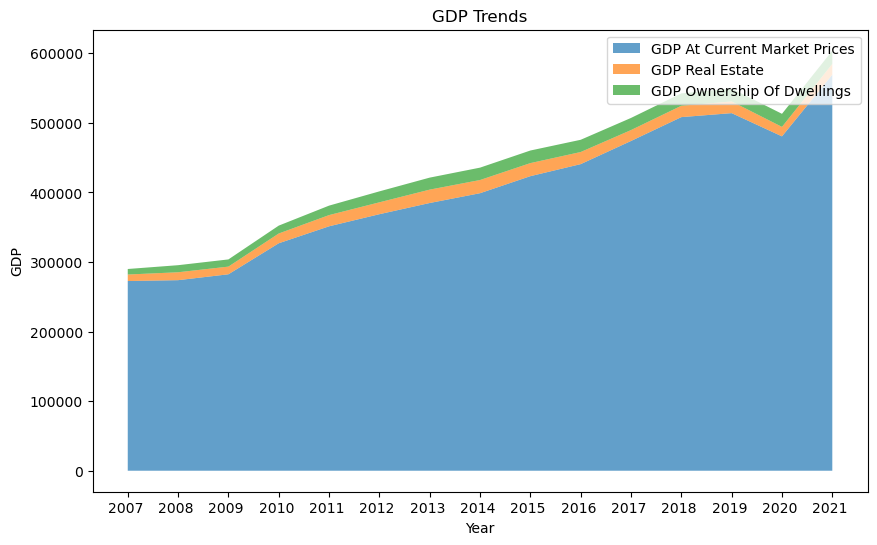

In [17]:
# Convert columns to numeric type because it was not accepting integers
gdp_df['GDP At Current Market Prices'] = pd.to_numeric(gdp_df['GDP At Current Market Prices'], errors='coerce')
gdp_df['GDP Real Estate'] = pd.to_numeric(gdp_df['GDP Real Estate'], errors='coerce')
gdp_df['GDP Ownership Of Dwellings'] = pd.to_numeric(gdp_df['GDP Ownership Of Dwellings'], errors='coerce')

plt.figure(figsize=(10, 6))

# Plotting the components separately with fill_between
plt.fill_between(gdp_df['Year'], gdp_df['GDP At Current Market Prices'], label='GDP At Current Market Prices', alpha=0.7)
plt.fill_between(gdp_df['Year'], gdp_df['GDP At Current Market Prices'], gdp_df['GDP At Current Market Prices'] + gdp_df['GDP Real Estate'], label='GDP Real Estate', alpha=0.7)
plt.fill_between(gdp_df['Year'], gdp_df['GDP At Current Market Prices'] + gdp_df['GDP Real Estate'], gdp_df['GDP At Current Market Prices'] + gdp_df['GDP Real Estate'] + gdp_df['GDP Ownership Of Dwellings'], label='GDP Ownership Of Dwellings', alpha=0.7)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Trends')

# Adding legend
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**GDP Trends Graph**

The graph gives us a visual representation of how the GDP for real estate and ownership of dwellings contribute to the overall GDP at Current Market Prices. Therefore, we can infer that they have a dependent relationship between one another. Thus, if there is reduced interest and participation in purchasing homes, it would affect the GDP Ownership of Dwellings and then consequently the GDP Real Estate and GDP at Current Market Prices.

### DataFrame Preparation: household_income_df
Source: Singapore Department of Statistics

In [18]:
# Reading in the household_income_df csv file 
household_income_df = pd.read_csv('hdb_data/average_median_income.csv')

In [19]:
# Printing the dataframes to better understand and analyse the data
household_income_df

,Year,Resident Households,Resident Employed Households,Average,Median1,Average.1,Median1.1,Unnamed: 7
0,2022,11480,8615,13124,10099,NaN,NaN,NaN
1,2021,10832,8220,12276,9520,NaN,NaN,NaN
2,2020,10608,7744,12235,9189,NaN,NaN,NaN
3,2019,10750,7981,12386,9425,NaN,NaN,NaN
4,2018,10664,7955,12137,9293,NaN,NaN,NaN
5,2017,10610,7850,12027,9023,NaN,NaN,NaN
6,2016,10336,7748,11589,8846,NaN,NaN,NaN
7,2015,10394,7733,11510,8666,NaN,NaN,NaN
8,2014,9982,7320,11143,8292,NaN,NaN,NaN
9,2013,9481,7030,10469,7872,NaN,NaN,NaN


In [20]:
# Drop the columns as they were irrelevant and save the dataframe
household_income_df.drop(['Average.1', 'Median1.1', 'Unnamed: 7'], axis = 1, inplace = True)

In [21]:
# Rename the column Median1 to Median
household_income_df = household_income_df.rename(columns={'Median1':'Median Income'})
household_income_df = household_income_df.rename(columns={'Average':'Average Income'})
household_income_df

,Year,Resident Households,Resident Employed Households,Average Income,Median Income
0,2022,11480,8615,13124,10099
1,2021,10832,8220,12276,9520
2,2020,10608,7744,12235,9189
3,2019,10750,7981,12386,9425
4,2018,10664,7955,12137,9293
5,2017,10610,7850,12027,9023
6,2016,10336,7748,11589,8846
7,2015,10394,7733,11510,8666
8,2014,9982,7320,11143,8292
9,2013,9481,7030,10469,7872


In [22]:
# Changing the order of the years, 2007 - 2021
# Resetting the index of the household_income_df
household_income_df = household_income_df.sort_values(by='Year', ascending=True).reset_index(drop=True)
household_income_df

,Year,Resident Households,Resident Employed Households,Average Income,Median Income
0,2000,5436,4000,5947,4398
1,2001,5972,4363,6417,4716
2,2002,5667,4096,6229,4590
3,2003,5670,4071,6276,4612
4,2004,5666,4066,6285,4552
5,2005,5934,4270,6593,4831
6,2006,6181,4430,6792,4952
7,2007,6790,4846,7431,5362
8,2008,7691,5492,8414,6100
9,2009,7410,5360,8195,6006


In [23]:
# Drop multiple rows based on indices (e.g., indices 1 and 3)
indices_to_drop = [0,1,2,3,4,5,6,22]
household_income_df = household_income_df.drop(indices_to_drop)

# Display the household_income_df DataFrame after dropping rows
print("\nAfter dropping rows:")
print(household_income_df)


After dropping rows:
    Year  Resident Households  Resident Employed Households  Average Income  \
7   2007                 6790                          4846            7431   
8   2008                 7691                          5492            8414   
9   2009                 7410                          5360            8195   
10  2010                 7812                          5600            8726   
11  2011                 8722                          6307            9618   
12  2012                 9394                          6772           10348   
13  2013                 9481                          7030           10469   
14  2014                 9982                          7320           11143   
15  2015                10394                          7733           11510   
16  2016                10336                          7748           11589   
17  2017                10610                          7850           12027   
18  2018                10664 

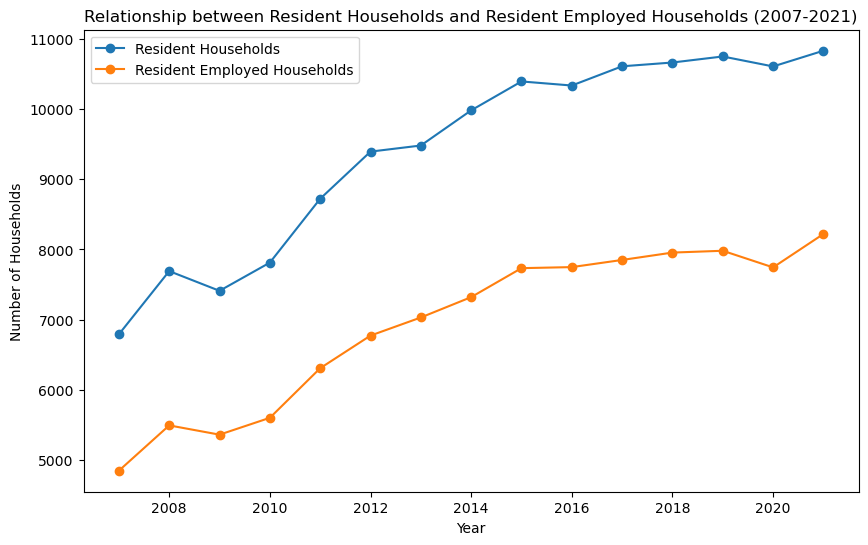

In [24]:
# line plot for: Relationship between Resident Households and Resident Employed Households (2007-2021)
plt.figure(figsize=(10, 6))
plt.plot(household_income_df['Year'], household_income_df['Resident Households'], marker='o', label='Resident Households')
plt.plot(household_income_df['Year'], household_income_df['Resident Employed Households'], marker='o', label='Resident Employed Households')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Households')
plt.title('Relationship between Resident Households and Resident Employed Households (2007-2021)')

# Adding legend
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Relationship between Resident Households and Resident Employed Households (2007-2021) Graph**

This graphs shows us that there is a high correlation between the number of resident households and the resident employed households. Resident household refers to a household where the household reference person is either a Singapore citizen or permanent resident. A resident employed household refers to a resident household with at least one employed person. Looking at this graph, we can make the inference that as the number of resident households increase, the number of resident employed households increase. 

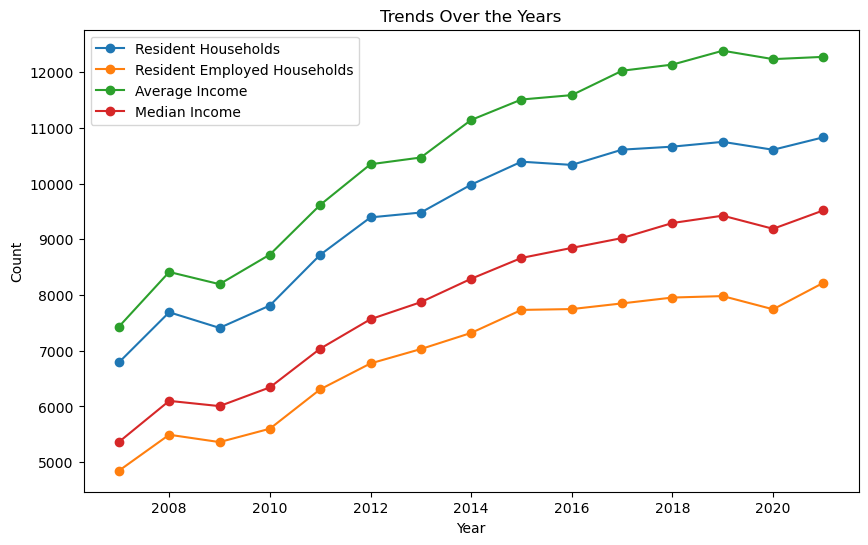

In [25]:
plt.figure(figsize=(10, 6))

# Time series line plot: Trends over the years
plt.plot(household_income_df['Year'], household_income_df['Resident Households'], label='Resident Households', marker='o')
plt.plot(household_income_df['Year'], household_income_df['Resident Employed Households'], label='Resident Employed Households', marker='o')
plt.plot(household_income_df['Year'], household_income_df['Average Income'], label='Average Income', marker='o')
plt.plot(household_income_df['Year'], household_income_df['Median Income'], label='Median Income', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trends Over the Years')
plt.legend()
plt.show()

The figure Trends Over the Years shows us that there is a upward trend across the different factors; number of resident households, number of resident employed households and the average and median of the income of the household. This shows us that when residents had higher income, they were more likely to purchase a home.

### DataFrame Preparation: transaction_df
Source: Singapore Open Data 

For this dataframe, I restructured the dataframe and removed data pertaining to the flat type HUDC as it has been privatised and therefore is no longer relevant for the analysis of the resale market. In addition, I grouped all data from the same year together.

In [26]:
transaction_df = pd.read_csv('hdb_data/resale_transactions.csv')

In [27]:
transaction_df

,financial_year,flat_type,resale_transactions
0,2006,1 room,22
1,2006,2 room,314
2,2006,3 room,9230
3,2006,4 room,10851
4,2006,5 room,6314
...,...,...,...
100,2021,2 room,446
101,2021,3 room,6747
102,2021,4 room,12972
103,2021,5 room,7950


In [28]:
#rename the column Median1 to Median
transaction_df = transaction_df.rename(columns={'financial_year':'Year','flat_type':'Type','resale_transactions':'No. Transactions'})
transaction_df

,Year,Type,No. Transactions
0,2006,1 room,22
1,2006,2 room,314
2,2006,3 room,9230
3,2006,4 room,10851
4,2006,5 room,6314
...,...,...,...
100,2021,2 room,446
101,2021,3 room,6747
102,2021,4 room,12972
103,2021,5 room,7950


In [29]:
transaction_df.head()

,Year,Type,No. Transactions
0,2006,1 room,22
1,2006,2 room,314
2,2006,3 room,9230
3,2006,4 room,10851
4,2006,5 room,6314


In [30]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              105 non-null    int64 
 1   Type              105 non-null    object
 2   No. Transactions  105 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [31]:
transaction_df.describe()

,Year,No. Transactions
count,105.000000,105.000000
mean,2013.200000,3878.914286
std,4.600167,3910.398064
min,2006.000000,1.000000
25%,2009.000000,269.000000
50%,2013.000000,2211.000000
75%,2017.000000,6791.000000
max,2021.000000,14365.000000


In [32]:
# Checking for missing values in the dateframe
transaction_df.isnull().sum()

Year                0
Type                0
No. Transactions    0
dtype: int64

In [33]:
# Assuming df is your DataFrame
# Pivot the DataFrame
transaction_df = transaction_df.pivot(index='Year', columns='Type', values='No. Transactions').reset_index()

# Rename the columns
transaction_df.columns.name = None  # Remove the 'Type' name from the columns
transaction_df = transaction_df.rename(columns={'1 room': '1_room', '2 room': '2_room', '3 room': '3_room', '4 room': '4_room', '5 room': '5_room', 'Executive and Multi-generation': 'Executive', 'HUDC': 'HUDC',})

# Display the resulting DataFrame
print(transaction_df)

    Year  1_room  2_room   3_room   4_room   5_room  Executive  HUDC
0   2006    22.0   314.0   9230.0  10851.0   6314.0     2211.0  92.0
1   2007    19.0   269.0   8368.0  10864.0   7447.0     2569.0  76.0
2   2008    17.0   247.0   8295.0  10637.0   7253.0     2058.0  44.0
3   2009    13.0   400.0  10854.0  14365.0  10369.0     3242.0  77.0
4   2010    19.0   530.0   8940.0  10817.0   7274.0     2421.0  60.0
5   2011    14.0   414.0   7230.0   8933.0   5832.0     1874.0  34.0
6   2012    15.0   567.0   6777.0   8747.0   5402.0     2029.0  42.0
7   2013    10.0   581.0   5553.0   6560.0   3549.0     1293.0   6.0
8   2014    19.0   408.0   5472.0   6791.0   3822.0     1160.0   1.0
9   2015     9.0   291.0   5511.0   7857.0   4486.0     1466.0   NaN
10  2016     7.0   279.0   5509.0   8651.0   4893.0     1555.0   NaN
11  2017    10.0   333.0   5379.0   9154.0   5349.0     1780.0   NaN
12  2018    14.0   392.0   5719.0   9626.0   5854.0     1871.0   NaN
13  2019     8.0   517.0   6023.0 

In [34]:
transaction_df['1_room'] = transaction_df['1_room'].round(0)
transaction_df['2_room'] = transaction_df['2_room'].round(0)
transaction_df['3_room'] = transaction_df['3_room'].round(0)
transaction_df['4_room'] = transaction_df['4_room'].round(0)
transaction_df['5_room'] = transaction_df['5_room'].round(0)
transaction_df['Executive'] = transaction_df['Executive'].round(0)
transaction_df['HUDC'] = transaction_df['HUDC'].round(0)

# Print or use transaction_df as needed
print(transaction_df)

    Year  1_room  2_room   3_room   4_room   5_room  Executive  HUDC
0   2006    22.0   314.0   9230.0  10851.0   6314.0     2211.0  92.0
1   2007    19.0   269.0   8368.0  10864.0   7447.0     2569.0  76.0
2   2008    17.0   247.0   8295.0  10637.0   7253.0     2058.0  44.0
3   2009    13.0   400.0  10854.0  14365.0  10369.0     3242.0  77.0
4   2010    19.0   530.0   8940.0  10817.0   7274.0     2421.0  60.0
5   2011    14.0   414.0   7230.0   8933.0   5832.0     1874.0  34.0
6   2012    15.0   567.0   6777.0   8747.0   5402.0     2029.0  42.0
7   2013    10.0   581.0   5553.0   6560.0   3549.0     1293.0   6.0
8   2014    19.0   408.0   5472.0   6791.0   3822.0     1160.0   1.0
9   2015     9.0   291.0   5511.0   7857.0   4486.0     1466.0   NaN
10  2016     7.0   279.0   5509.0   8651.0   4893.0     1555.0   NaN
11  2017    10.0   333.0   5379.0   9154.0   5349.0     1780.0   NaN
12  2018    14.0   392.0   5719.0   9626.0   5854.0     1871.0   NaN
13  2019     8.0   517.0   6023.0 

In [35]:
# Drop multiple rows based on indices (e.g., indices 1 and 3)
indices_to_drop = [0]
transaction_df = transaction_df.drop(indices_to_drop)

# Display the DataFrame after dropping rows
print("\nAfter dropping rows:")
print(transaction_df)


After dropping rows:
    Year  1_room  2_room   3_room   4_room   5_room  Executive  HUDC
1   2007    19.0   269.0   8368.0  10864.0   7447.0     2569.0  76.0
2   2008    17.0   247.0   8295.0  10637.0   7253.0     2058.0  44.0
3   2009    13.0   400.0  10854.0  14365.0  10369.0     3242.0  77.0
4   2010    19.0   530.0   8940.0  10817.0   7274.0     2421.0  60.0
5   2011    14.0   414.0   7230.0   8933.0   5832.0     1874.0  34.0
6   2012    15.0   567.0   6777.0   8747.0   5402.0     2029.0  42.0
7   2013    10.0   581.0   5553.0   6560.0   3549.0     1293.0   6.0
8   2014    19.0   408.0   5472.0   6791.0   3822.0     1160.0   1.0
9   2015     9.0   291.0   5511.0   7857.0   4486.0     1466.0   NaN
10  2016     7.0   279.0   5509.0   8651.0   4893.0     1555.0   NaN
11  2017    10.0   333.0   5379.0   9154.0   5349.0     1780.0   NaN
12  2018    14.0   392.0   5719.0   9626.0   5854.0     1871.0   NaN
13  2019     8.0   517.0   6023.0  10401.0   6005.0     1818.0   NaN
14  2020    

In [36]:
# Drop the 'HUDC' column in place
# The HUDC column was dropped as they are now private developments and therefore, 
# there is no relevant data with resale purchases
transaction_df.drop(columns=['HUDC'], inplace=True)
transaction_df

,Year,1_room,2_room,3_room,4_room,5_room,Executive
1,2007,19.0,269.0,8368.0,10864.0,7447.0,2569.0
2,2008,17.0,247.0,8295.0,10637.0,7253.0,2058.0
3,2009,13.0,400.0,10854.0,14365.0,10369.0,3242.0
4,2010,19.0,530.0,8940.0,10817.0,7274.0,2421.0
5,2011,14.0,414.0,7230.0,8933.0,5832.0,1874.0
6,2012,15.0,567.0,6777.0,8747.0,5402.0,2029.0
7,2013,10.0,581.0,5553.0,6560.0,3549.0,1293.0
8,2014,19.0,408.0,5472.0,6791.0,3822.0,1160.0
9,2015,9.0,291.0,5511.0,7857.0,4486.0,1466.0
10,2016,7.0,279.0,5509.0,8651.0,4893.0,1555.0


In [37]:
# Remove ".0" from all columns
transaction_df = transaction_df.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Display the DataFrame after removing ".0"
print("\nAfter removing '.0':")
print(transaction_df)


After removing '.0':
    Year  1_room  2_room  3_room  4_room  5_room  Executive
1   2007      19     269    8368   10864    7447       2569
2   2008      17     247    8295   10637    7253       2058
3   2009      13     400   10854   14365   10369       3242
4   2010      19     530    8940   10817    7274       2421
5   2011      14     414    7230    8933    5832       1874
6   2012      15     567    6777    8747    5402       2029
7   2013      10     581    5553    6560    3549       1293
8   2014      19     408    5472    6791    3822       1160
9   2015       9     291    5511    7857    4486       1466
10  2016       7     279    5509    8651    4893       1555
11  2017      10     333    5379    9154    5349       1780
12  2018      14     392    5719    9626    5854       1871
13  2019       8     517    6023   10401    6005       1818
14  2020      13     440    6072   10941    6842       2128
15  2021       8     446    6747   12972    7950       2247


In [38]:
print(transaction_df.columns)

Index(['Year', '1_room', '2_room', '3_room', '4_room', '5_room', 'Executive'], dtype='object')


In [40]:
# Calculate kurtosis for each column
kurtosis_values = transaction_df.kurtosis()

# Print the results
print("Kurtosis for each column:")
print(kurtosis_values)

Kurtosis for each column:
Year        -1.200000
1_room      -1.313502
2_room      -1.076902
3_room       1.165023
4_room       0.357133
5_room       0.967370
Executive    1.220786
dtype: float64


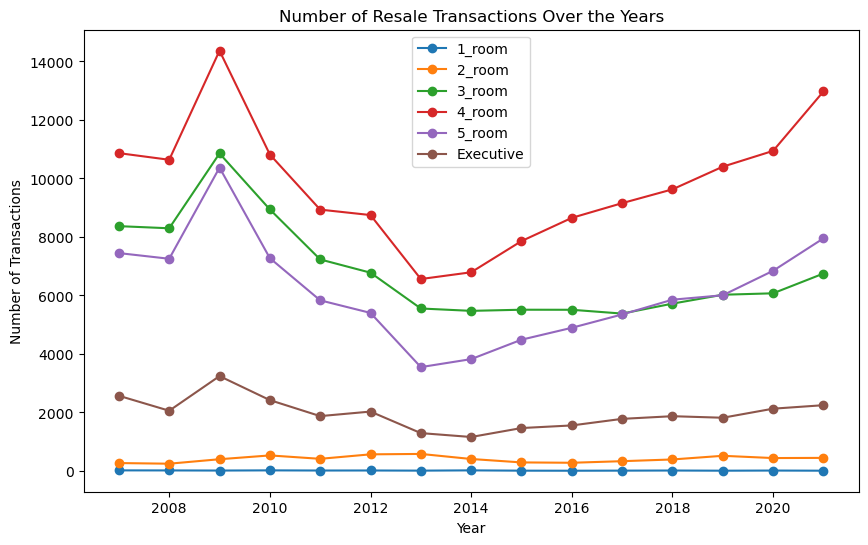

In [41]:
#Line Plot: Number of transactions over the years 
transaction_df = pd.DataFrame(transaction_df)

# Plotting of the line graph
plt.figure(figsize=(10, 6))

for room_type in transaction_df.columns[1:]:
    plt.plot(transaction_df['Year'], transaction_df[room_type], label=room_type, marker='o')

plt.title('Number of Resale Transactions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(False)
plt.show()

**Number of Resale Transactions Over the Years Graph**

 From the graph we can see that ther has been a steady increase in the number of resale transactions for the 5 room, 4 room, 3 room and Executive homes. However, the number of transactions for 1 room and 2 room homes have been stagnant over the years. Therefore, I can make the assumption that the sales for the 5 room, 4 room, 3 room and Executive homes will continue to see an increase over the next few years. 

### DataFrame Preparation: price_df
Source: Singapore Open Data 

For this dataframe, I cleaned by removing rows with NaN values and restructuring the data so that it is consistent by removing the information with regards to the quarter in which it was sold. In addition, I got two dataframes from this dataframe - town_yearly_median_df and median_price_yearly. 

In [42]:
price_df = pd.read_csv('hdb_data/MedianResalePricesforRegisteredApplicationsbyTownandFlatType.csv')

In [43]:
price_df

,quarter,town,flat_type,price
0,2007-Q2,Ang Mo Kio,1-room,na
1,2007-Q2,Ang Mo Kio,2-room,-
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000
...,...,...,...,...
10291,2023-Q3,YISHUN,2-room,-
10292,2023-Q3,YISHUN,3-room,385000
10293,2023-Q3,YISHUN,4-room,500000
10294,2023-Q3,YISHUN,5-room,650000


In [44]:
price_df.head()

,quarter,town,flat_type,price
0,2007-Q2,Ang Mo Kio,1-room,na
1,2007-Q2,Ang Mo Kio,2-room,-
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000


In [45]:
price_df.describe()

,quarter,town,flat_type,price
count,10296,10296,10296,10098
unique,66,52,6,1261
top,2007-Q2,Ang Mo Kio,1-room,-
freq,156,288,1716,2795


In [46]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quarter    10296 non-null  object
 1   town       10296 non-null  object
 2   flat_type  10296 non-null  object
 3   price      10098 non-null  object
dtypes: object(4)
memory usage: 321.9+ KB


In [47]:
price_df.isnull().sum()

quarter        0
town           0
flat_type      0
price        198
dtype: int64

In [48]:
# Identify and remove rows with '-' or 'na'
price_df = price_df[(price_df != '-') & (price_df != 'na')].dropna()

# Remove additional rows with NA values
price_df.dropna(inplace=True)

# Display the cleaned DataFrame
print(price_df)

       quarter        town  flat_type   price
2      2007-Q2  Ang Mo Kio     3-room  172000
3      2007-Q2  Ang Mo Kio     4-room  260000
4      2007-Q2  Ang Mo Kio     5-room  372000
8      2007-Q2       Bedok     3-room  172000
9      2007-Q2       Bedok     4-room  224500
...        ...         ...        ...     ...
10288  2023-Q3   WOODLANDS     5-room  590000
10289  2023-Q3   WOODLANDS  Executive  802000
10292  2023-Q3      YISHUN     3-room  385000
10293  2023-Q3      YISHUN     4-room  500000
10294  2023-Q3      YISHUN     5-room  650000

[4735 rows x 4 columns]


In [49]:
price_df

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000
4,2007-Q2,Ang Mo Kio,5-room,372000
8,2007-Q2,Bedok,3-room,172000
9,2007-Q2,Bedok,4-room,224500
...,...,...,...,...
10288,2023-Q3,WOODLANDS,5-room,590000
10289,2023-Q3,WOODLANDS,Executive,802000
10292,2023-Q3,YISHUN,3-room,385000
10293,2023-Q3,YISHUN,4-room,500000


In [50]:
# Remove the '-Q1', '-Q2', '-Q3', etc., from the 'quarter' column
# I removed it so that it would be easier when merging all the datasets to 1NF
price_df['quarter'] = price_df['quarter'].str.replace('-Q[0-9]', '', regex=True)

# Rename the columns
price_df.rename(columns={'quarter': 'Year', 'town':'Town','flat_type': 'Type', 'price':'Price'}, inplace=True)

# Display the DataFrame after removing the suffixes
price_df

,Year,Town,Type,Price
2,2007,Ang Mo Kio,3-room,172000
3,2007,Ang Mo Kio,4-room,260000
4,2007,Ang Mo Kio,5-room,372000
8,2007,Bedok,3-room,172000
9,2007,Bedok,4-room,224500
...,...,...,...,...
10288,2023,WOODLANDS,5-room,590000
10289,2023,WOODLANDS,Executive,802000
10292,2023,YISHUN,3-room,385000
10293,2023,YISHUN,4-room,500000


In [51]:
# Group by Year and calculate the median Price of the flats
median_price_yearly = price_df.groupby('Year')['Price'].median().reset_index()

# Rename the 'Price' column to 'Median_price'
median_price_yearly = median_price_yearly.rename(columns={'Price': 'yearly_median_price'})

# Display the resulting DataFrame
print(median_price_yearly)

    Year yearly_median_price
0   2007            293000.0
1   2008            333000.0
2   2009            365000.0
3   2010            410000.0
4   2011            450000.0
5   2012            480000.0
6   2013            482500.0
7   2014            440000.0
8   2015            425000.0
9   2016            435000.0
10  2017            435000.0
11  2018            436200.0
12  2019            425000.0
13  2020            435000.0
14  2021            515900.0
15  2022            548000.0
16  2023            572000.0


In [52]:
# Drop multiple rows based on indices (e.g., indices 1 and 3)
indices_to_drop = [15,16]
median_price_yearly = median_price_yearly.drop(indices_to_drop)

# Display the DataFrame after dropping rows
print("\nAfter dropping rows:")
print(median_price_yearly)


After dropping rows:
    Year yearly_median_price
0   2007            293000.0
1   2008            333000.0
2   2009            365000.0
3   2010            410000.0
4   2011            450000.0
5   2012            480000.0
6   2013            482500.0
7   2014            440000.0
8   2015            425000.0
9   2016            435000.0
10  2017            435000.0
11  2018            436200.0
12  2019            425000.0
13  2020            435000.0
14  2021            515900.0


In [53]:
# Remove ".0" from all columns
median_price_yearly = median_price_yearly.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Display the DataFrame after removing ".0"
print("\nAfter removing '.0':")
print(median_price_yearly)


After removing '.0':
    Year  yearly_median_price
0   2007               293000
1   2008               333000
2   2009               365000
3   2010               410000
4   2011               450000
5   2012               480000
6   2013               482500
7   2014               440000
8   2015               425000
9   2016               435000
10  2017               435000
11  2018               436200
12  2019               425000
13  2020               435000
14  2021               515900


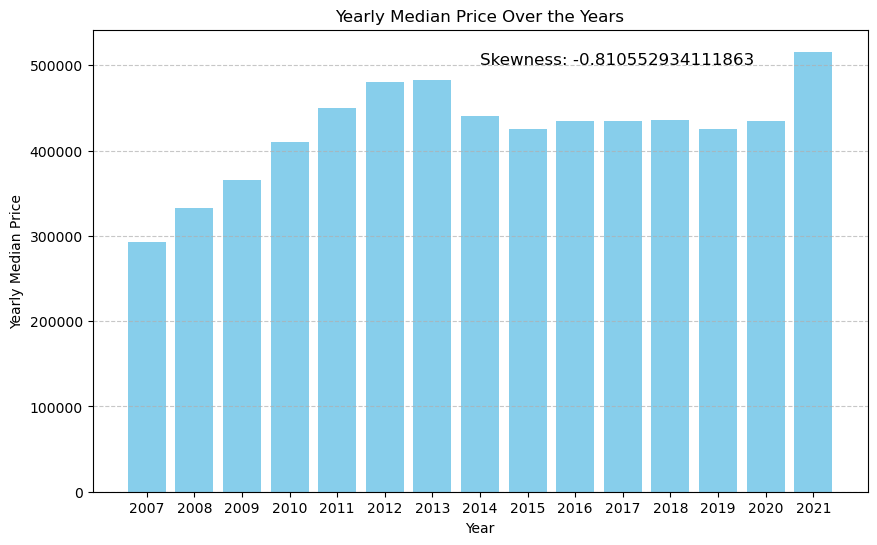

In [54]:
# skewness for the 'yearly_median_price' column in the dataframe
skewness_value = skew(median_price_yearly['yearly_median_price'])

# Plotting
plt.figure(figsize=(10, 6))

# Line plot for 'yearly_median_price'
plt.bar(median_price_yearly['Year'], median_price_yearly['yearly_median_price'], color='skyblue')
#sns.boxplot(x=median_price_yearly['yearly_median_price'], color='skyblue')
plt.title('Yearly Median Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Yearly Median Price')
#plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Print the skewness value
plt.text(0.5, 0.95, f'Skewness: {skewness_value}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

**Yearly Median Price Over the Years Graph**

From the above graph, we have an overview of the median prices of flats over the year. As we can see from the line plot, it has a left skewed distribution. The negative skewness suggests that there is a high concentration of high prices on the lower end and that there is a few higher priced outliers which has pulled the average tpwards the lower values. The skewness of -0.811 (rounded to the nearest 3 significant figures) indicates a left skewed distribution of yearly median prices. Therefore, the median yearly prices may be more representative of the central tendency, and they might not necessarily increase.

In [55]:
# I wanted to find the median of each town by each year
# Convert 'Town' column to lowercase
price_df['Town'] = price_df['Town'].str.lower()

# Create a new column for the combination of 'Year' and 'Town'
price_df['Year_Town'] = price_df['Year'].astype(str) + '_' + price_df['Town']

# Create a pivot table to get median prices for each combination of 'Year' and 'Town'
pivot_df = price_df.pivot_table(index=['Year', 'Town'], values='Price', aggfunc='median')

# Reset the index to make 'Year' and 'Town' regular columns
pivot_df.reset_index(inplace=True)

# Pivot the table again so that the towns are the columns
town_yearly_median_df = pivot_df.pivot(index='Year', columns='Town', values='Price')

# Reset the index to make 'Year' a regular column
town_yearly_median_df.reset_index(inplace=True)

# Rename the columns to include '_median' suffix
town_yearly_median_df.columns = [f'{col}_median' if col != 'Year' else col for col in town_yearly_median_df.columns]

# Print or use final_df as needed
town_yearly_median_df

,Year,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,central_median,central area_median,choa chu kang_median,...,pasir ris_median,punggol_median,queenstown_median,sembawang_median,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median
0,2007,280000.0,257000.0,370250.0,331900.0,396500.0,249000.0,300000.0,NaN,291900.0,...,310000.0,300000.0,410000.0,292000.0,316000.0,275500.0,301500.0,337500.0,263000.0,218000.0
1,2008,327000.0,305000.0,407000.0,333000.0,435550.0,289500.0,310000.0,NaN,350400.0,...,370000.0,351000.0,461500.0,325500.0,371000.0,324500.0,357000.0,396750.0,298250.0,255500.0
2,2009,340000.0,335000.0,412500.0,360000.0,457950.0,335650.0,340000.0,NaN,358000.0,...,386500.0,388000.0,461500.0,362000.0,381600.0,345000.0,375000.0,405750.0,323000.0,292000.0
3,2010,398750.0,384000.0,510000.0,435000.0,521000.0,372250.0,372500.0,NaN,415000.0,...,430250.0,430000.0,527500.0,415250.0,445000.0,393300.0,415000.0,434000.0,360000.0,337000.0
4,2011,434250.0,410500.0,571000.0,424000.0,583750.0,425000.0,418750.0,NaN,449250.0,...,486250.0,484500.0,370000.0,440000.0,494000.0,410000.0,461150.0,495250.0,400500.0,377000.0
5,2012,466500.0,434750.0,527500.0,439250.0,606000.0,481800.0,442500.0,NaN,485000.0,...,520000.0,523500.0,513000.0,474000.0,515950.0,473000.0,499000.0,548950.0,430000.0,414000.0
6,2013,486500.0,452500.0,551500.0,440000.0,673250.0,485000.0,NaN,NaN,461250.0,...,530750.0,526500.0,543500.0,491000.0,532000.0,470000.0,512100.0,592000.0,441250.0,411000.0
7,2014,451000.0,430000.0,525000.0,418000.0,647950.0,409000.0,432500.0,NaN,424250.0,...,502750.0,469000.0,528250.0,419500.0,470900.0,407500.0,457400.0,438250.0,410000.0,368000.0
8,2015,450000.0,412500.0,535000.0,404500.0,627500.0,365000.0,839400.0,NaN,415500.0,...,469500.0,438250.0,517500.0,420000.0,458000.0,388000.0,470250.0,491500.0,365000.0,359000.0
9,2016,466500.0,410000.0,666000.0,400000.0,617500.0,353300.0,620000.0,NaN,412600.0,...,471200.0,449450.0,680000.0,415000.0,452500.0,449750.0,477500.0,537500.0,390000.0,367000.0


In [56]:
# Merge 'central_median' and 'central area_median' columns into a new column 'combined_median'
town_yearly_median_df['combined_median'] = town_yearly_median_df['central_median'].combine_first(town_yearly_median_df['central area_median'])

# Drop the original columns
town_yearly_median_df.drop(['central_median', 'central area_median'], axis=1, inplace=True)

# Print or use df as needed
print(town_yearly_median_df)

    Year ang mo kio_median bedok_median bishan_median bukit batok_median  \
0   2007          280000.0     257000.0      370250.0           331900.0   
1   2008          327000.0     305000.0      407000.0           333000.0   
2   2009          340000.0     335000.0      412500.0           360000.0   
3   2010          398750.0     384000.0      510000.0           435000.0   
4   2011          434250.0     410500.0      571000.0           424000.0   
5   2012          466500.0     434750.0      527500.0           439250.0   
6   2013          486500.0     452500.0      551500.0           440000.0   
7   2014          451000.0     430000.0      525000.0           418000.0   
8   2015          450000.0     412500.0      535000.0           404500.0   
9   2016          466500.0     410000.0      666000.0           400000.0   
10  2017          462000.0     418000.0      662650.0           395000.0   
11  2018          446000.0     408000.0      660750.0           385000.0   
12  2019    

In [57]:
town_yearly_median_df.rename(columns={'combined_median': 'central_median'}, inplace=True)

# Print or use final_df as needed
town_yearly_median_df 

,Year,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,geylang_median,...,punggol_median,queenstown_median,sembawang_median,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median
0,2007,280000.0,257000.0,370250.0,331900.0,396500.0,249000.0,291900.0,302200.0,268250.0,...,300000.0,410000.0,292000.0,316000.0,275500.0,301500.0,337500.0,263000.0,218000.0,300000.0
1,2008,327000.0,305000.0,407000.0,333000.0,435550.0,289500.0,350400.0,351500.0,322500.0,...,351000.0,461500.0,325500.0,371000.0,324500.0,357000.0,396750.0,298250.0,255500.0,310000.0
2,2009,340000.0,335000.0,412500.0,360000.0,457950.0,335650.0,358000.0,388000.0,363000.0,...,388000.0,461500.0,362000.0,381600.0,345000.0,375000.0,405750.0,323000.0,292000.0,340000.0
3,2010,398750.0,384000.0,510000.0,435000.0,521000.0,372250.0,415000.0,432000.0,397500.0,...,430000.0,527500.0,415250.0,445000.0,393300.0,415000.0,434000.0,360000.0,337000.0,372500.0
4,2011,434250.0,410500.0,571000.0,424000.0,583750.0,425000.0,449250.0,420000.0,459750.0,...,484500.0,370000.0,440000.0,494000.0,410000.0,461150.0,495250.0,400500.0,377000.0,418750.0
5,2012,466500.0,434750.0,527500.0,439250.0,606000.0,481800.0,485000.0,438500.0,457000.0,...,523500.0,513000.0,474000.0,515950.0,473000.0,499000.0,548950.0,430000.0,414000.0,442500.0
6,2013,486500.0,452500.0,551500.0,440000.0,673250.0,485000.0,461250.0,390000.0,403650.0,...,526500.0,543500.0,491000.0,532000.0,470000.0,512100.0,592000.0,441250.0,411000.0,NaN
7,2014,451000.0,430000.0,525000.0,418000.0,647950.0,409000.0,424250.0,435250.0,311500.0,...,469000.0,528250.0,419500.0,470900.0,407500.0,457400.0,438250.0,410000.0,368000.0,432500.0
8,2015,450000.0,412500.0,535000.0,404500.0,627500.0,365000.0,415500.0,428750.0,453000.0,...,438250.0,517500.0,420000.0,458000.0,388000.0,470250.0,491500.0,365000.0,359000.0,839400.0
9,2016,466500.0,410000.0,666000.0,400000.0,617500.0,353300.0,412600.0,422500.0,373750.0,...,449450.0,680000.0,415000.0,452500.0,449750.0,477500.0,537500.0,390000.0,367000.0,620000.0


In [58]:
# Drop multiple rows based on indices (e.g., indices 1 and 3)
indices_to_drop = [15,16]
town_yearly_median_df = town_yearly_median_df.drop(indices_to_drop)

# Display the DataFrame after dropping rows
print("\nAfter dropping rows:")
print(town_yearly_median_df)


After dropping rows:
    Year ang mo kio_median bedok_median bishan_median bukit batok_median  \
0   2007          280000.0     257000.0      370250.0           331900.0   
1   2008          327000.0     305000.0      407000.0           333000.0   
2   2009          340000.0     335000.0      412500.0           360000.0   
3   2010          398750.0     384000.0      510000.0           435000.0   
4   2011          434250.0     410500.0      571000.0           424000.0   
5   2012          466500.0     434750.0      527500.0           439250.0   
6   2013          486500.0     452500.0      551500.0           440000.0   
7   2014          451000.0     430000.0      525000.0           418000.0   
8   2015          450000.0     412500.0      535000.0           404500.0   
9   2016          466500.0     410000.0      666000.0           400000.0   
10  2017          462000.0     418000.0      662650.0           395000.0   
11  2018          446000.0     408000.0      660750.0           38

In [59]:
# Remove ".0" from all columns
town_yearly_median_df = town_yearly_median_df.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Display the DataFrame after removing ".0" from all the town columns
print("\nAfter removing '.0':")
print(town_yearly_median_df)

# there was a row with a NaN value so i used interpolate
# Instead of having 0 or dropping the entire value, i made a decision to use interpolate
town_yearly_median_df = town_yearly_median_df.interpolate()
print("\nAfter the interpolation:")
print(town_yearly_median_df)


After removing '.0':
    Year  ang mo kio_median  bedok_median  bishan_median  bukit batok_median  \
0   2007             280000        257000         370250              331900   
1   2008             327000        305000         407000              333000   
2   2009             340000        335000         412500              360000   
3   2010             398750        384000         510000              435000   
4   2011             434250        410500         571000              424000   
5   2012             466500        434750         527500              439250   
6   2013             486500        452500         551500              440000   
7   2014             451000        430000         525000              418000   
8   2015             450000        412500         535000              404500   
9   2016             466500        410000         666000              400000   
10  2017             462000        418000         662650              395000   
11  2018          

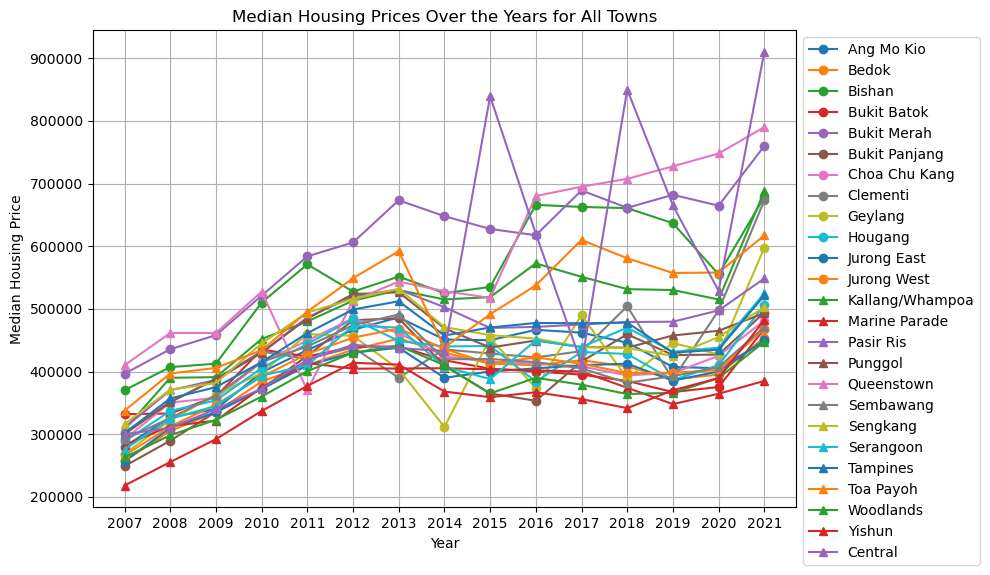

In [60]:
plt.figure(figsize=(10, 6))

# Plotting the median housing prices for the first group of towns (circles)
for i, column in enumerate(town_yearly_median_df.columns[1:len(town_yearly_median_df.columns)//2]):  # Exclude the 'Year' column
    plt.plot(town_yearly_median_df['Year'], town_yearly_median_df[column], label=column.replace('_median', '').title(), marker='o', linestyle='-')

# Plotting the median housing prices for the second group of towns (triangles)
for i, column in enumerate(town_yearly_median_df.columns[len(town_yearly_median_df.columns)//2:]):  # Exclude the 'Year' column
    plt.plot(town_yearly_median_df['Year'], town_yearly_median_df[column], label=column.replace('_median', '').title(), marker='^', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Median Housing Price')
plt.title('Median Housing Prices Over the Years for All Towns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot for better visibility
plt.grid(True)

# Display plot
plt.tight_layout()
plt.show()

**Median Housing Prices Over the Years for All Towns Graph**

Looking at the graph, there is an overall uptrend in the median prices across all towns over the years. However, the median prices of specific town such as the Bukit Merah and Geylang towns fluctuate the most over the years. 

### DataFrame Preparation: application_df
Source: Singapore Open Data

During the pre-processing stage, I removed all rows pertaining to rental flats as it was not part of this projects scope.

In [61]:
application_df = pd.read_csv('hdb_data/Applicationsregisteredforresaleflatsandrentalflats.csv')

In [62]:
application_df

,financial_year,type,applications_registered
0,2007,resale,29612
1,2007,rental,5970
2,2008,resale,28551
3,2008,rental,3695
4,2009,resale,39320
5,2009,rental,2681
6,2010,resale,30061
7,2010,rental,2736
8,2011,resale,24331
9,2011,rental,4918


In [63]:
application_df = application_df[application_df['type'] != 'rental']

# Display the modified DataFrame application_df
print(application_df)

    financial_year    type  applications_registered
0             2007  resale                    29612
2             2008  resale                    28551
4             2009  resale                    39320
6             2010  resale                    30061
8             2011  resale                    24331
10            2012  resale                    23579
12            2013  resale                    17552
14            2014  resale                    17673
16            2015  resale                    19620
18            2016  resale                    20894
20            2017  resale                    22005
22            2018  resale                    23476
24            2019  resale                    24772
26            2020  resale                    26436
28            2021  resale                    30370
30            2022  resale                    27941


In [64]:
# renaming the columns 
application_df = application_df.rename(columns={'financial_year': 'Year', 'applications_registered': 'no_resale_applications'})

# Display application_df
print(application_df)

    Year    type  no_resale_applications
0   2007  resale                   29612
2   2008  resale                   28551
4   2009  resale                   39320
6   2010  resale                   30061
8   2011  resale                   24331
10  2012  resale                   23579
12  2013  resale                   17552
14  2014  resale                   17673
16  2015  resale                   19620
18  2016  resale                   20894
20  2017  resale                   22005
22  2018  resale                   23476
24  2019  resale                   24772
26  2020  resale                   26436
28  2021  resale                   30370
30  2022  resale                   27941


In [65]:
# Drop the 'type' column in place
application_df.drop(columns=['type'], inplace=True)

In [66]:
application_df

,Year,no_resale_applications
0,2007,29612
2,2008,28551
4,2009,39320
6,2010,30061
8,2011,24331
10,2012,23579
12,2013,17552
14,2014,17673
16,2015,19620
18,2016,20894


In [67]:
# Drop multiple rows based on indices (e.g., indices 1 and 3)
indices_to_drop = [30]
application_df = application_df.drop(indices_to_drop)

# Display the DataFrame application_df after dropping rows
print("\nAfter dropping rows:")
print(application_df)


After dropping rows:
    Year  no_resale_applications
0   2007                   29612
2   2008                   28551
4   2009                   39320
6   2010                   30061
8   2011                   24331
10  2012                   23579
12  2013                   17552
14  2014                   17673
16  2015                   19620
18  2016                   20894
20  2017                   22005
22  2018                   23476
24  2019                   24772
26  2020                   26436
28  2021                   30370


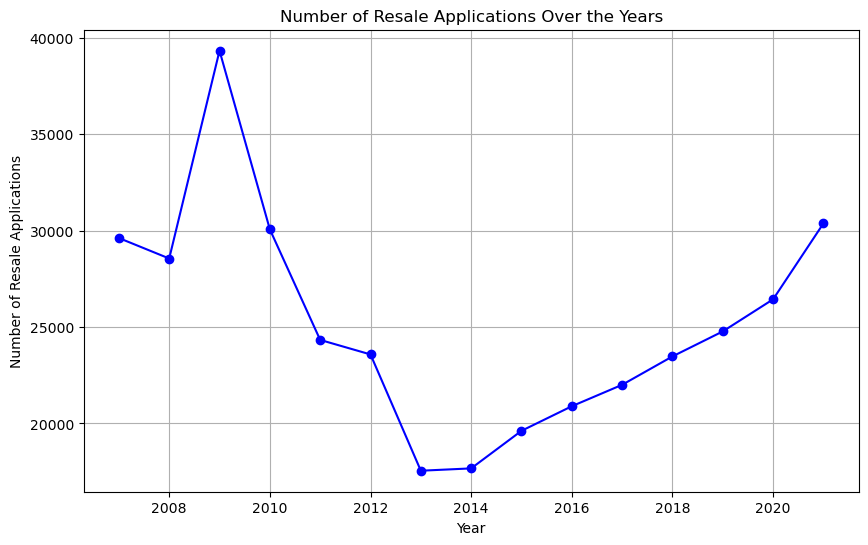

In [68]:
application_df = pd.DataFrame(application_df)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(application_df['Year'], application_df['no_resale_applications'], marker='o', linestyle='-', color='b')

plt.title('Number of Resale Applications Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Resale Applications')
plt.grid(True)
plt.show()

**Number of Resale Applications Over the Years Graph**

The number of reslae applications that have been submitted over the years has been on a upward trend over the last few years from 2013. Therefore, we can assume that it will continue to increase unless there is a major disruption in the housing market. 

### 3.7 DataFrame Preparation: Merging Dataframes - First Normal Form

In this portion of the project, I will be merging all the different dataframes that have been restructured and pre-processed to get a First Normal Form for this dataframe.

In [69]:
# Merging 2 dataeframes: population_df household_income_df
merge1_df = pd.merge(population_df, household_income_df, on='Year', how='right')

# Print the new dataframe out merge1_df
merge1_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,Resident Employed Households,Average Income,Median Income
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,4846,7431,5362
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,5492,8414,6100
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,5360,8195,6006
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,5600,8726,6342
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,6307,9618,7037
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,6772,10348,7566
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,7030,10469,7872
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,7320,11143,8292
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,7733,11510,8666
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,7748,11589,8846


In [70]:
# Merging 2 dataeframes: merge1_df application_df
merge2_df = pd.merge(merge1_df, application_df, on='Year', how='right')
merge2_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,Resident Employed Households,Average Income,Median Income,no_resale_applications
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,4846,7431,5362,29612
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,5492,8414,6100,28551
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,5360,8195,6006,39320
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,5600,8726,6342,30061
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,6307,9618,7037,24331
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,6772,10348,7566,23579
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,7030,10469,7872,17552
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,7320,11143,8292,17673
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,7733,11510,8666,19620
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,7748,11589,8846,20894


In [71]:
# Merge of population_df, household_income_df and application_df and transaction_df 
merge3_df = pd.merge(merge2_df, transaction_df, on='Year', how='right')
merge3_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,Resident Employed Households,Average Income,Median Income,no_resale_applications,1_room,2_room,3_room,4_room,5_room,Executive
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,4846,7431,5362,29612,19,269,8368,10864,7447,2569
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,5492,8414,6100,28551,17,247,8295,10637,7253,2058
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,5360,8195,6006,39320,13,400,10854,14365,10369,3242
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,5600,8726,6342,30061,19,530,8940,10817,7274,2421
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,6307,9618,7037,24331,14,414,7230,8933,5832,1874
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,6772,10348,7566,23579,15,567,6777,8747,5402,2029
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,7030,10469,7872,17552,10,581,5553,6560,3549,1293
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,7320,11143,8292,17673,19,408,5472,6791,3822,1160
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,7733,11510,8666,19620,9,291,5511,7857,4486,1466
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,7748,11589,8846,20894,7,279,5509,8651,4893,1555


In [72]:
# Changing data type so I can merge the dataframes together
merge3_df['Year'] = merge3_df['Year'].astype(int)
median_price_yearly['Year'] = median_price_yearly['Year'].astype(int)

# Merging of the dataframes
merge4_df = pd.merge(merge3_df, median_price_yearly, on='Year', how='right')
merge4_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,Average Income,Median Income,no_resale_applications,1_room,2_room,3_room,4_room,5_room,Executive,yearly_median_price
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,...,7431,5362,29612,19,269,8368,10864,7447,2569,293000
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,...,8414,6100,28551,17,247,8295,10637,7253,2058,333000
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,...,8195,6006,39320,13,400,10854,14365,10369,3242,365000
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,...,8726,6342,30061,19,530,8940,10817,7274,2421,410000
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,...,9618,7037,24331,14,414,7230,8933,5832,1874,450000
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,...,10348,7566,23579,15,567,6777,8747,5402,2029,480000
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,...,10469,7872,17552,10,581,5553,6560,3549,1293,482500
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,...,11143,8292,17673,19,408,5472,6791,3822,1160,440000
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,...,11510,8666,19620,9,291,5511,7857,4486,1466,425000
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,...,11589,8846,20894,7,279,5509,8651,4893,1555,435000


In [73]:
# changing data type so I can merge the dataframes together
merge4_df['Year'] = merge4_df['Year'].astype(int)
town_yearly_median_df['Year'] = town_yearly_median_df['Year'].astype(int)

merge5_df = pd.merge(merge4_df, town_yearly_median_df, on='Year', how='right')
merge5_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,punggol_median,queenstown_median,sembawang_median,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,...,300000,410000,292000,316000,275500,301500,337500,263000,218000,300000.0
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,...,351000,461500,325500,371000,324500,357000,396750,298250,255500,310000.0
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,...,388000,461500,362000,381600,345000,375000,405750,323000,292000,340000.0
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,...,430000,527500,415250,445000,393300,415000,434000,360000,337000,372500.0
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,...,484500,370000,440000,494000,410000,461150,495250,400500,377000,418750.0
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,...,523500,513000,474000,515950,473000,499000,548950,430000,414000,442500.0
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,...,526500,543500,491000,532000,470000,512100,592000,441250,411000,437500.0
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,...,469000,528250,419500,470900,407500,457400,438250,410000,368000,432500.0
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,...,438250,517500,420000,458000,388000,470250,491500,365000,359000,839400.0
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,...,449450,680000,415000,452500,449750,477500,537500,390000,367000,620000.0


In [74]:
# changing data type so I can merge the dataframes together
merge5_df['Year'] = merge5_df['Year'].astype(int)
gdp_df['Year'] = gdp_df['Year'].astype(int)

merge6_df = pd.merge(merge5_df, gdp_df, on='Year', how='right')
merge6_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP At Current Market Prices,GDP Real Estate,GDP Ownership Of Dwellings
0,2007,4588599,3583082,3133848,449234,1005517,4.3,1.6,6552,6790,...,316000,275500,301500,337500,263000,218000,300000.0,272697.6,9360.7,7943.3
1,2008,4839396,3642659,3164438,478221,1196737,5.5,1.7,6846,7691,...,371000,324500,357000,396750,298250,255500,310000.0,273941.6,11362.8,10166.2
2,2009,4987573,3733876,3200693,533183,1253697,3.1,2.5,7025,7410,...,381600,345000,375000,405750,323000,292000,340000.0,282394.5,11027.5,10351.7
3,2010,5076732,3771721,3230719,541002,1305011,1.8,1,7146,7812,...,445000,393300,415000,434000,360000,337000,372500.0,326980.1,14034.8,11347.1
4,2011,5183688,3789251,3257228,532023,1394437,2.1,0.5,7273,8722,...,494000,410000,461150,495250,400500,377000,418750.0,351367.9,16127.2,13604.9
5,2012,5312437,3818205,3285140,533065,1494232,2.5,0.8,7429,9394,...,515950,473000,499000,548950,430000,414000,442500.0,368770.5,17078.0,15749.3
6,2013,5399162,3844751,3313507,531244,1554411,1.6,0.7,7540,9481,...,532000,470000,512100,592000,441250,411000,437500.0,384870.3,19243.2,17251.0
7,2014,5469724,3870739,3343030,527709,1598985,1.3,0.7,7615,9982,...,470900,407500,457400,438250,410000,368000,432500.0,398947.9,18962.7,17797.2
8,2015,5535002,3902690,3375023,527667,1632312,1.2,0.8,7697,10394,...,458000,388000,470250,491500,365000,359000,839400.0,423444.1,18781.5,18100.1
9,2016,5607283,3933559,3408943,524616,1673724,1.3,0.8,7797,10336,...,452500,449750,477500,537500,390000,367000,620000.0,440754.7,17410.3,17589.4


In [75]:
merge6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            15 non-null     int32  
 1   Total Population                15 non-null     int64  
 2   Resident Population             15 non-null     object 
 3   Singapore Citizen Population    15 non-null     object 
 4   Permanent Resident Population   15 non-null     object 
 5   Non-Resident Population         15 non-null     object 
 6   Total Population Growth         15 non-null     float64
 7   Resident Population Growth      15 non-null     object 
 8   Population Density              15 non-null     object 
 9   Resident Households             15 non-null     int64  
 10  Resident Employed Households    15 non-null     int64  
 11  Average Income                  15 non-null     int64  
 12  Median Income                   15 non

In [76]:
# Changing the data types of multiple columns Resident Population, Singapore Citizen Population, Permanent Resident Population
# Non-Resident Population, Total Population Growth, Resident Population
# Population Density, marine parade_median, central_median
# GDP At Current Market Prices, GDP Real Estate, GDP Ownership Of Dwellings

merge6_df['Resident Population '] = merge6_df['Resident Population '].astype('int64')

merge6_df['Singapore Citizen Population '] = merge6_df['Singapore Citizen Population '].astype('int64')

merge6_df['Permanent Resident Population '] = merge6_df['Permanent Resident Population '].astype('int64')

merge6_df['Non-Resident Population '] = merge6_df['Non-Resident Population '].astype('int64')
                                                                                     
merge6_df['Total Population Growth '] = merge6_df['Total Population Growth '].astype('int64')
merge6_df['Resident Population ']  = merge6_df['Resident Population '].astype('int64')



merge6_df['Population Density '] = merge6_df['Population Density '].astype('int64')

merge6_df['marine parade_median'] = merge6_df['marine parade_median'].astype('int64')
                                                                                     
merge6_df['central_median'] = merge6_df['central_median'].astype('int64')
merge6_df['GDP At Current Market Prices']  = merge6_df['GDP At Current Market Prices'].astype('int64')
merge6_df['GDP Real Estate'] = merge6_df['GDP Real Estate'].astype('int64')
merge6_df[ 'GDP Ownership Of Dwellings']  = merge6_df[ 'GDP Ownership Of Dwellings'].astype('int64')


In [77]:
# Checking the data types in the merge6_df dataframe
merge6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            15 non-null     int32 
 1   Total Population                15 non-null     int64 
 2   Resident Population             15 non-null     int64 
 3   Singapore Citizen Population    15 non-null     int64 
 4   Permanent Resident Population   15 non-null     int64 
 5   Non-Resident Population         15 non-null     int64 
 6   Total Population Growth         15 non-null     int64 
 7   Resident Population Growth      15 non-null     object
 8   Population Density              15 non-null     int64 
 9   Resident Households             15 non-null     int64 
 10  Resident Employed Households    15 non-null     int64 
 11  Average Income                  15 non-null     int64 
 12  Median Income                   15 non-null     int6

### DataFrame Preparation: Feature Engineering - First Normal Form DataFrame

After merging the dataframes, I decided that there were some columns that would not be as heplful in analysing for the linear regression model. Instead, I decided to get columns from the merged dataframe and create new columns which would be more representative of the dataframe. 

New columns created in the dataframe:
1. Population Growth Rate - Total Population Growth & Total Population
2. Population Density per Resident Household - Population Density & Resident Households
3. Median Price Change - yearly_median_price
4. GDP per Capita - GDP At Current Market Prices & Total Population 

In [78]:
# Population Growth Rate:
# Adding in Population growth rate. 
# This column represents the growth rate which is the chnage in population 
merge6_df['Population Growth Rate'] = (merge6_df['Total Population Growth '] / merge6_df['Total Population ']) * 100
merge6_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP At Current Market Prices,GDP Real Estate,GDP Ownership Of Dwellings,Population Growth Rate
0,2007,4588599,3583082,3133848,449234,1005517,4,1.6,6552,6790,...,275500,301500,337500,263000,218000,300000,272697,9360,7943,0.000087
1,2008,4839396,3642659,3164438,478221,1196737,5,1.7,6846,7691,...,324500,357000,396750,298250,255500,310000,273941,11362,10166,0.000103
2,2009,4987573,3733876,3200693,533183,1253697,3,2.5,7025,7410,...,345000,375000,405750,323000,292000,340000,282394,11027,10351,0.000060
3,2010,5076732,3771721,3230719,541002,1305011,1,1,7146,7812,...,393300,415000,434000,360000,337000,372500,326980,14034,11347,0.000020
4,2011,5183688,3789251,3257228,532023,1394437,2,0.5,7273,8722,...,410000,461150,495250,400500,377000,418750,351367,16127,13604,0.000039
5,2012,5312437,3818205,3285140,533065,1494232,2,0.8,7429,9394,...,473000,499000,548950,430000,414000,442500,368770,17078,15749,0.000038
6,2013,5399162,3844751,3313507,531244,1554411,1,0.7,7540,9481,...,470000,512100,592000,441250,411000,437500,384870,19243,17251,0.000019
7,2014,5469724,3870739,3343030,527709,1598985,1,0.7,7615,9982,...,407500,457400,438250,410000,368000,432500,398947,18962,17797,0.000018
8,2015,5535002,3902690,3375023,527667,1632312,1,0.8,7697,10394,...,388000,470250,491500,365000,359000,839400,423444,18781,18100,0.000018
9,2016,5607283,3933559,3408943,524616,1673724,1,0.8,7797,10336,...,449750,477500,537500,390000,367000,620000,440754,17410,17589,0.000018


In [79]:
# Population Density per Resident Household: population density per resident household.
merge6_df['Population Density per Resident Household'] = merge6_df['Population Density '] / merge6_df['Resident Households']
merge6_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP At Current Market Prices,GDP Real Estate,GDP Ownership Of Dwellings,Population Growth Rate,Population Density per Resident Household
0,2007,4588599,3583082,3133848,449234,1005517,4,1.6,6552,6790,...,301500,337500,263000,218000,300000,272697,9360,7943,0.000087,0.964948
1,2008,4839396,3642659,3164438,478221,1196737,5,1.7,6846,7691,...,357000,396750,298250,255500,310000,273941,11362,10166,0.000103,0.890131
2,2009,4987573,3733876,3200693,533183,1253697,3,2.5,7025,7410,...,375000,405750,323000,292000,340000,282394,11027,10351,0.000060,0.948043
3,2010,5076732,3771721,3230719,541002,1305011,1,1,7146,7812,...,415000,434000,360000,337000,372500,326980,14034,11347,0.000020,0.914747
4,2011,5183688,3789251,3257228,532023,1394437,2,0.5,7273,8722,...,461150,495250,400500,377000,418750,351367,16127,13604,0.000039,0.833868
5,2012,5312437,3818205,3285140,533065,1494232,2,0.8,7429,9394,...,499000,548950,430000,414000,442500,368770,17078,15749,0.000038,0.790824
6,2013,5399162,3844751,3313507,531244,1554411,1,0.7,7540,9481,...,512100,592000,441250,411000,437500,384870,19243,17251,0.000019,0.795275
7,2014,5469724,3870739,3343030,527709,1598985,1,0.7,7615,9982,...,457400,438250,410000,368000,432500,398947,18962,17797,0.000018,0.762873
8,2015,5535002,3902690,3375023,527667,1632312,1,0.8,7697,10394,...,470250,491500,365000,359000,839400,423444,18781,18100,0.000018,0.740523
9,2016,5607283,3933559,3408943,524616,1673724,1,0.8,7797,10336,...,477500,537500,390000,367000,620000,440754,17410,17589,0.000018,0.754354


In [80]:
# Median Price Change: representing the change in median prices from the previous year

merge6_df['Median Price Change Year'] = merge6_df['yearly_median_price'].diff()

# Replace NaN values in Median Price Change Year with 0
merge6_df["Median Price Change Year"] = pd.to_numeric(merge6_df["Median Price Change Year"], errors="coerce").astype("Int64")
merge6_df["Median Price Change Year"] = merge6_df["Median Price Change Year"].fillna(0) 

# Display merge6_df after the conversion
print("\nAfter converting Median Price Change Year:")
print(merge6_df)



After converting Median Price Change Year:
    Year  Total Population   Resident Population   \
0   2007            4588599               3583082   
1   2008            4839396               3642659   
2   2009            4987573               3733876   
3   2010            5076732               3771721   
4   2011            5183688               3789251   
5   2012            5312437               3818205   
6   2013            5399162               3844751   
7   2014            5469724               3870739   
8   2015            5535002               3902690   
9   2016            5607283               3933559   
10  2017            5612253               3965796   
11  2018            5638676               3994283   
12  2019            5703569               4026209   
13  2020            5685807               4044210   
14  2021            5453566               3986842   

    Singapore Citizen Population   Permanent Resident Population   \
0                         3133848     

In [81]:
# GDP per Capita 
merge6_df['GDP per Capita'] = merge6_df['GDP At Current Market Prices'] / merge6_df['Total Population ']
merge6_df

,Year,Total Population,Resident Population,Singapore Citizen Population,Permanent Resident Population,Non-Resident Population,Total Population Growth,Resident Population Growth,Population Density,Resident Households,...,woodlands_median,yishun_median,central_median,GDP At Current Market Prices,GDP Real Estate,GDP Ownership Of Dwellings,Population Growth Rate,Population Density per Resident Household,Median Price Change Year,GDP per Capita
0,2007,4588599,3583082,3133848,449234,1005517,4,1.6,6552,6790,...,263000,218000,300000,272697,9360,7943,0.000087,0.964948,0,0.059429
1,2008,4839396,3642659,3164438,478221,1196737,5,1.7,6846,7691,...,298250,255500,310000,273941,11362,10166,0.000103,0.890131,40000,0.056606
2,2009,4987573,3733876,3200693,533183,1253697,3,2.5,7025,7410,...,323000,292000,340000,282394,11027,10351,0.000060,0.948043,32000,0.056620
3,2010,5076732,3771721,3230719,541002,1305011,1,1,7146,7812,...,360000,337000,372500,326980,14034,11347,0.000020,0.914747,45000,0.064408
4,2011,5183688,3789251,3257228,532023,1394437,2,0.5,7273,8722,...,400500,377000,418750,351367,16127,13604,0.000039,0.833868,40000,0.067783
5,2012,5312437,3818205,3285140,533065,1494232,2,0.8,7429,9394,...,430000,414000,442500,368770,17078,15749,0.000038,0.790824,30000,0.069416
6,2013,5399162,3844751,3313507,531244,1554411,1,0.7,7540,9481,...,441250,411000,437500,384870,19243,17251,0.000019,0.795275,2500,0.071283
7,2014,5469724,3870739,3343030,527709,1598985,1,0.7,7615,9982,...,410000,368000,432500,398947,18962,17797,0.000018,0.762873,-42500,0.072937
8,2015,5535002,3902690,3375023,527667,1632312,1,0.8,7697,10394,...,365000,359000,839400,423444,18781,18100,0.000018,0.740523,-15000,0.076503
9,2016,5607283,3933559,3408943,524616,1673724,1,0.8,7797,10336,...,390000,367000,620000,440754,17410,17589,0.000018,0.754354,10000,0.078604


In [82]:
merge6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       15 non-null     int32  
 1   Total Population                           15 non-null     int64  
 2   Resident Population                        15 non-null     int64  
 3   Singapore Citizen Population               15 non-null     int64  
 4   Permanent Resident Population              15 non-null     int64  
 5   Non-Resident Population                    15 non-null     int64  
 6   Total Population Growth                    15 non-null     int64  
 7   Resident Population Growth                 15 non-null     object 
 8   Population Density                         15 non-null     int64  
 9   Resident Households                        15 non-null     int64  
 10  Resident Employed Households

## Multiple Linear Regression

In this portion, I want to find the linear regression in two different areas. The reason why I want to look into the correaltions of these 2 topics is so that I am able to get a more in-depth analysis of how the prices will differ in the future. 
1. Prediciting the yearly median price for resale flats 
2. Predicting each towns' yearly median price for resale flats

In [83]:
# Trying to find the factors with the highest correlation
# By using corr() I am able to find the correlation between the yearly median price and other factors
merge6_df.corr()['yearly_median_price']

Year                                         0.667580
Total Population                             0.715791
Resident Population                          0.698723
Singapore Citizen Population                 0.642837
Permanent Resident Population                0.551895
Non-Resident Population                      0.701012
Total Population Growth                     -0.788820
Resident Population Growth                  -0.779925
Population Density                           0.700415
Resident Households                          0.735150
Resident Employed Households                 0.735028
Average Income                               0.710936
Median Income                                0.706825
no_resale_applications                      -0.453906
1_room                                      -0.512795
2_room                                       0.600214
3_room                                      -0.580993
4_room                                      -0.318794
5_room                      

### Predicting Yearly Median

#### Predicting Yearly Median: Data Preparation

In [84]:
print(merge6_df.columns)

Index(['Year', 'Total Population ', 'Resident Population ',
       'Singapore Citizen Population ', 'Permanent Resident Population ',
       'Non-Resident Population ', 'Total Population Growth ',
       'Resident Population Growth ', 'Population Density ',
       'Resident Households', 'Resident Employed Households', 'Average Income',
       'Median Income', 'no_resale_applications', '1_room', '2_room', '3_room',
       '4_room', '5_room', 'Executive', 'yearly_median_price',
       'ang mo kio_median', 'bedok_median', 'bishan_median',
       'bukit batok_median', 'bukit merah_median', 'bukit panjang_median',
       'choa chu kang_median', 'clementi_median', 'geylang_median',
       'hougang_median', 'jurong east_median', 'jurong west_median',
       'kallang/whampoa_median', 'marine parade_median', 'pasir ris_median',
       'punggol_median', 'queenstown_median', 'sembawang_median',
       'sengkang_median', 'serangoon_median', 'tampines_median',
       'toa payoh_median', 'woodlands_

In [85]:
columns_to_drop = [ 'Total Population ', 'Resident Population ',
                    'Singapore Citizen Population ', 'Permanent Resident Population ',
                   'Non-Resident Population ', 'Total Population Growth ',
                   'Resident Population Growth ', 'Population Density ',
                   'Resident Households', 'Resident Employed Households', 'Average Income',
                   'Median Income', 'no_resale_applications', '1_room', '2_room', '3_room',
                   '4_room', '5_room', 'Executive',
                   'GDP At Current Market Prices','Population Growth Rate',
                      'Population Density per Resident Household', 'Median Price Change Year']
# Drop the specified columns
yearly_prediction_median_df = merge6_df.drop(columns=columns_to_drop, axis=1)
   
yearly_prediction_median_df

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP Real Estate,GDP Ownership Of Dwellings,GDP per Capita
0,2007,293000,280000,257000,370250,331900,396500,249000,291900,302200,...,316000,275500,301500,337500,263000,218000,300000,9360,7943,0.059429
1,2008,333000,327000,305000,407000,333000,435550,289500,350400,351500,...,371000,324500,357000,396750,298250,255500,310000,11362,10166,0.056606
2,2009,365000,340000,335000,412500,360000,457950,335650,358000,388000,...,381600,345000,375000,405750,323000,292000,340000,11027,10351,0.056620
3,2010,410000,398750,384000,510000,435000,521000,372250,415000,432000,...,445000,393300,415000,434000,360000,337000,372500,14034,11347,0.064408
4,2011,450000,434250,410500,571000,424000,583750,425000,449250,420000,...,494000,410000,461150,495250,400500,377000,418750,16127,13604,0.067783
5,2012,480000,466500,434750,527500,439250,606000,481800,485000,438500,...,515950,473000,499000,548950,430000,414000,442500,17078,15749,0.069416
6,2013,482500,486500,452500,551500,440000,673250,485000,461250,390000,...,532000,470000,512100,592000,441250,411000,437500,19243,17251,0.071283
7,2014,440000,451000,430000,525000,418000,647950,409000,424250,435250,...,470900,407500,457400,438250,410000,368000,432500,18962,17797,0.072937
8,2015,425000,450000,412500,535000,404500,627500,365000,415500,428750,...,458000,388000,470250,491500,365000,359000,839400,18781,18100,0.076503
9,2016,435000,466500,410000,666000,400000,617500,353300,412600,422500,...,452500,449750,477500,537500,390000,367000,620000,17410,17589,0.078604


In [86]:
print(yearly_prediction_median_df.columns)

Index(['Year', 'yearly_median_price', 'ang mo kio_median', 'bedok_median',
       'bishan_median', 'bukit batok_median', 'bukit merah_median',
       'bukit panjang_median', 'choa chu kang_median', 'clementi_median',
       'geylang_median', 'hougang_median', 'jurong east_median',
       'jurong west_median', 'kallang/whampoa_median', 'marine parade_median',
       'pasir ris_median', 'punggol_median', 'queenstown_median',
       'sembawang_median', 'sengkang_median', 'serangoon_median',
       'tampines_median', 'toa payoh_median', 'woodlands_median',
       'yishun_median', 'central_median', 'GDP Real Estate',
       'GDP Ownership Of Dwellings', 'GDP per Capita'],
      dtype='object')


In [87]:
#Building our model 

train_data = yearly_prediction_median_df[yearly_prediction_median_df["Year"] < 2018].copy()
test_data = yearly_prediction_median_df[yearly_prediction_median_df["Year"] >= 2018].copy()

In [88]:
train_data.shape

(11, 30)

In [89]:
test_data.shape

(4, 30)

In [90]:
reg = LinearRegression()

In [91]:
predictors =['ang mo kio_median', 'bedok_median',
       'bishan_median', 'bukit batok_median', 'bukit merah_median',
       'bukit panjang_median', 'choa chu kang_median', 'clementi_median',
       'geylang_median', 'hougang_median', 'jurong east_median',
       'jurong west_median', 'kallang/whampoa_median', 'marine parade_median',
       'pasir ris_median', 'punggol_median', 'queenstown_median',
       'sembawang_median', 'sengkang_median', 'serangoon_median',
       'tampines_median', 'toa payoh_median', 'woodlands_median',
       'yishun_median', 'central_median', 'GDP Real Estate',
       'GDP Ownership Of Dwellings', 'GDP per Capita']
target = "yearly_median_price"

In [92]:
reg.fit(train_data[predictors], train_data["yearly_median_price"])

LinearRegression()

In [93]:
# Creating predictions using the predictors that I have idenitifed
predictions = reg.predict(test_data[predictors])

In [94]:
# A new column predictions_yearly_median 
test_data["predictions_yearly_median"] = predictions

In [95]:
# Displaying the test that I have run and looking at the predictions
test_data

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP Real Estate,GDP Ownership Of Dwellings,GDP per Capita,predictions_yearly_median
11,2018,436200,446000,408000,660750,385000,661250,459500,394000,504000,...,470000,478000,580750,364000,341500,850000,16337,17751,0.090152,447315.938745
12,2019,425000,407250,387500,636750,367200,682000,426250,397500,387500,...,431500,430000,557250,366000,370000,665000,16836,18453,0.090131,429611.299081
13,2020,435000,405200,395000,555000,375250,664700,427000,425000,497500,...,438000,435000,558000,389500,389500,528750,13610,18785,0.084542,439505.250771
14,2021,515900,448000,454200,678750,468000,760000,494000,481250,673250,...,524900,521500,617200,447500,482000,910000,15515,18912,0.104402,516609.567522


In [96]:
test_data['predictions_yearly_median'] = test_data['predictions_yearly_median'].round().astype(int)
# Display the modified DataFrame
test_data

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP Real Estate,GDP Ownership Of Dwellings,GDP per Capita,predictions_yearly_median
11,2018,436200,446000,408000,660750,385000,661250,459500,394000,504000,...,470000,478000,580750,364000,341500,850000,16337,17751,0.090152,447316
12,2019,425000,407250,387500,636750,367200,682000,426250,397500,387500,...,431500,430000,557250,366000,370000,665000,16836,18453,0.090131,429611
13,2020,435000,405200,395000,555000,375250,664700,427000,425000,497500,...,438000,435000,558000,389500,389500,528750,13610,18785,0.084542,439505
14,2021,515900,448000,454200,678750,468000,760000,494000,481250,673250,...,524900,521500,617200,447500,482000,910000,15515,18912,0.104402,516610


#### Predicting Yearly Median: Data Visualisation 

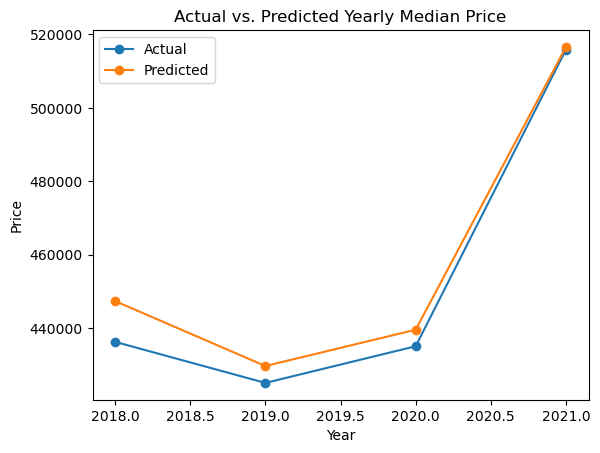

In [97]:
test_data.plot(x='Year', y=['yearly_median_price', 'predictions_yearly_median'], kind='line', marker='o')

# Plotting of the line graph Actual vs. Predicted Yearly Median Price
plt.title('Actual vs. Predicted Yearly Median Price')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.legend(['Actual', 'Predicted'])
plt.show()

**Actual vs. Predicted Yearly Median Price Graph**

We can see from the graph, that the model has been successful in predicting the yearly median price. Therefore, we can confirm that the predictors that we have identified does play a significant factor in contributing toward the yearly median prices.

#### 4.1.3 Predicting Yearly Median: Data Evaluation 

In [98]:
merge6_df.describe()["yearly_median_price"]

count        15.000000
mean     424040.000000
std       57051.778487
min      293000.000000
25%      417500.000000
50%      435000.000000
75%      445000.000000
max      515900.000000
Name: yearly_median_price, dtype: float64

In [99]:
mse_error = mean_squared_error(test_data["yearly_median_price"], test_data["predictions_yearly_median"])
rmse_error = np.sqrt(mse_error)

print("Root Mean Squared Error (RMSE):", rmse_error)

Root Mean Squared Error (RMSE): 6434.7863600899755


**Evaluation: Yearly Median Price - Root Mean Squared Error (RMSE)**

In order to evaluate the performance of the model to predict the future yearly median prices across all types of flats and towns, I used the Root Mean Squared Error value. I chose to use RMSE as it would take the square root of the averaged squared difference between the actual and predicted yearly median price. 
Furthermore, it penalises the larger error much heavier than if I were have used the Mean Absolute Error (MAE) as it squares the errors. Looking at the model, the RSME score was 6434.7863600899755 which means that on average, the predictions made by the model was off by approximately $6434. In the context of the housing market, I think that is a relatively good value for the model to have attained.

### Multiple Linear Regression: Predicting Town's Yearly Median

#### Predicting Town's Yearly Media: Data Preparation

In [100]:
# Predicting each towns median for the future 
columns_to_drop = [ 'Total Population ', 'Resident Population ',
       'Singapore Citizen Population ', 'Permanent Resident Population ',
       'Non-Resident Population ', 'Total Population Growth ',
       'Resident Population Growth ', 'Population Density ',
       'Resident Households', 'Resident Employed Households', 'Average Income',
       'Median Income', 'no_resale_applications', '1_room', '2_room', '3_room',
       '4_room', '5_room', 'Executive',
       'GDP At Current Market Prices','Population Growth Rate',
       'Population Density per Resident Household', 'Median Price Change Year']

# Drop the specified columns
town_yearly_prediction_median_df = merge6_df.drop(columns=columns_to_drop, axis=1)

# Display the modified DataFrame
town_yearly_prediction_median_df

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP Real Estate,GDP Ownership Of Dwellings,GDP per Capita
0,2007,293000,280000,257000,370250,331900,396500,249000,291900,302200,...,316000,275500,301500,337500,263000,218000,300000,9360,7943,0.059429
1,2008,333000,327000,305000,407000,333000,435550,289500,350400,351500,...,371000,324500,357000,396750,298250,255500,310000,11362,10166,0.056606
2,2009,365000,340000,335000,412500,360000,457950,335650,358000,388000,...,381600,345000,375000,405750,323000,292000,340000,11027,10351,0.056620
3,2010,410000,398750,384000,510000,435000,521000,372250,415000,432000,...,445000,393300,415000,434000,360000,337000,372500,14034,11347,0.064408
4,2011,450000,434250,410500,571000,424000,583750,425000,449250,420000,...,494000,410000,461150,495250,400500,377000,418750,16127,13604,0.067783
5,2012,480000,466500,434750,527500,439250,606000,481800,485000,438500,...,515950,473000,499000,548950,430000,414000,442500,17078,15749,0.069416
6,2013,482500,486500,452500,551500,440000,673250,485000,461250,390000,...,532000,470000,512100,592000,441250,411000,437500,19243,17251,0.071283
7,2014,440000,451000,430000,525000,418000,647950,409000,424250,435250,...,470900,407500,457400,438250,410000,368000,432500,18962,17797,0.072937
8,2015,425000,450000,412500,535000,404500,627500,365000,415500,428750,...,458000,388000,470250,491500,365000,359000,839400,18781,18100,0.076503
9,2016,435000,466500,410000,666000,400000,617500,353300,412600,422500,...,452500,449750,477500,537500,390000,367000,620000,17410,17589,0.078604


In [101]:
# Building our model 
train_data_x = town_yearly_prediction_median_df[town_yearly_prediction_median_df["Year"] < 2018].copy()

test_data_x = town_yearly_prediction_median_df[town_yearly_prediction_median_df["Year"] >= 2018].copy()

In [102]:
train_data_x.shape

(11, 30)

In [103]:
test_data_x.shape

(4, 30)

In [104]:
predictors = ['yearly_median_price', 'GDP Real Estate', 'GDP Ownership Of Dwellings', 'GDP per Capita']

# Initialize a dictionary to store predictions for each town
predictions_dict = {}

# Iterate over each town and make predictions
for town in ["ang mo kio_median", "bedok_median", "bishan_median", "bukit batok_median", "bukit merah_median",
             "bukit panjang_median", "choa chu kang_median", "clementi_median", "geylang_median", "hougang_median",
             "jurong east_median", "jurong west_median", "kallang/whampoa_median", "marine parade_median",
             "pasir ris_median", "punggol_median", "queenstown_median", "sembawang_median", "sengkang_median",
             "serangoon_median", "tampines_median", "toa payoh_median", "woodlands_median", "yishun_median", "central_median"]:
    
    # Fit the model for the current town
    reg.fit(train_data_x[predictors], train_data_x[town])
    
    # Make predictions for the years 2018, 2019, 2020, and 2021
    predictions = reg.predict(test_data_x[test_data_x['Year'].isin([2018, 2019, 2020, 2021])][predictors])
    
    # Store the predictions in the dictionary
    predictions_dict[town + "_prediction"] = predictions

# Add the predicted columns to test_data_x 
for key, value in predictions_dict.items():
    test_data_x[key] = np.nan  # Add new columns with NaN values
    test_data_x.loc[test_data_x['Year'].isin([2018, 2019, 2020, 2021]), key] = value  # Assign predictions to the correct rows

# Drop additional rows with NaN values
test_data_x = test_data_x.dropna(subset=['ang mo kio_median_prediction'])

# Reset index 
test_data_x = test_data_x.reset_index(drop=True)

In [105]:
test_data_x

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,punggol_median_prediction,queenstown_median_prediction,sembawang_median_prediction,sengkang_median_prediction,serangoon_median_prediction,tampines_median_prediction,toa payoh_median_prediction,woodlands_median_prediction,yishun_median_prediction,central_median_prediction
0,2018,436200,446000,408000,660750,385000,661250,459500,394000,504000,...,431456.983257,718585.692187,406074.485186,437893.730862,443758.558191,479963.233382,607500.027552,375724.226072,360443.181867,537077.438377
1,2019,425000,407250,387500,636750,367200,682000,426250,397500,387500,...,418386.614673,720913.598156,393867.270520,427015.882148,429925.903655,473613.049567,587619.426443,367589.701348,349980.514621,591508.370451
2,2020,435000,405200,395000,555000,375250,664700,427000,425000,497500,...,438258.009006,847755.722152,387387.987370,407477.038170,478217.393098,494841.085694,681381.671410,376992.942659,357731.413400,399400.956986
3,2021,515900,448000,454200,678750,468000,760000,494000,481250,673250,...,506552.281430,892702.591778,469458.825097,491127.210426,559131.872959,561832.760365,813964.320771,432623.103605,435534.950940,375945.792167


In [106]:
prediction_columns = [col for col in test_data_x.columns if col.endswith("_prediction")]

# Round all the prediction columns
test_data_x[prediction_columns] = test_data_x[prediction_columns].round().astype(int)

# Display test_data_x
print(test_data_x)

   Year  yearly_median_price  ang mo kio_median  bedok_median  bishan_median  \
0  2018               436200             446000        408000         660750   
1  2019               425000             407250        387500         636750   
2  2020               435000             405200        395000         555000   
3  2021               515900             448000        454200         678750   

   bukit batok_median  bukit merah_median  bukit panjang_median  \
0              385000              661250                459500   
1              367200              682000                426250   
2              375250              664700                427000   
3              468000              760000                494000   

   choa chu kang_median  clementi_median  ...  punggol_median_prediction  \
0                394000           504000  ...                     431457   
1                397500           387500  ...                     418387   
2                425000           4

#### Predicting Town's Yearly Median: Data Visualations

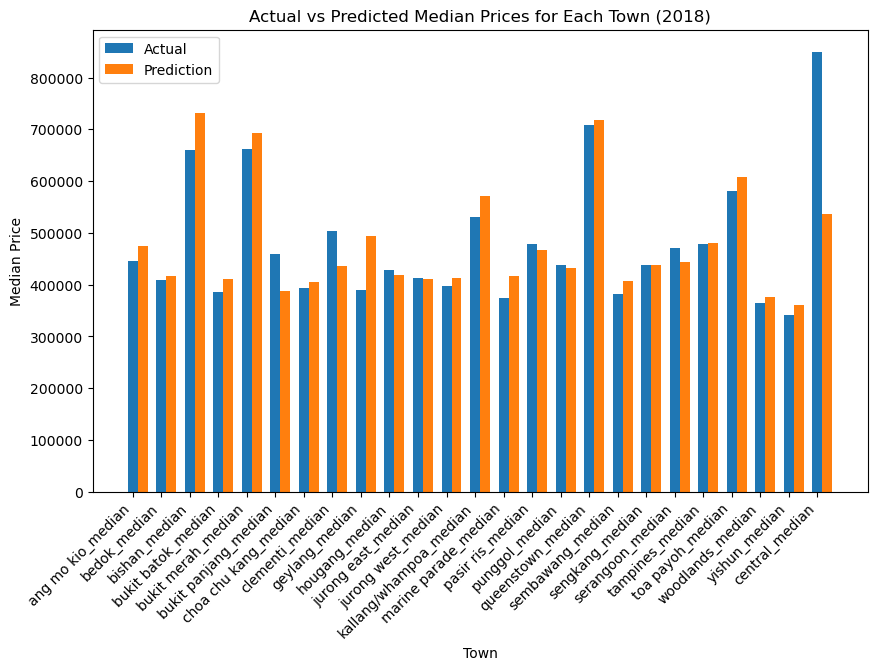

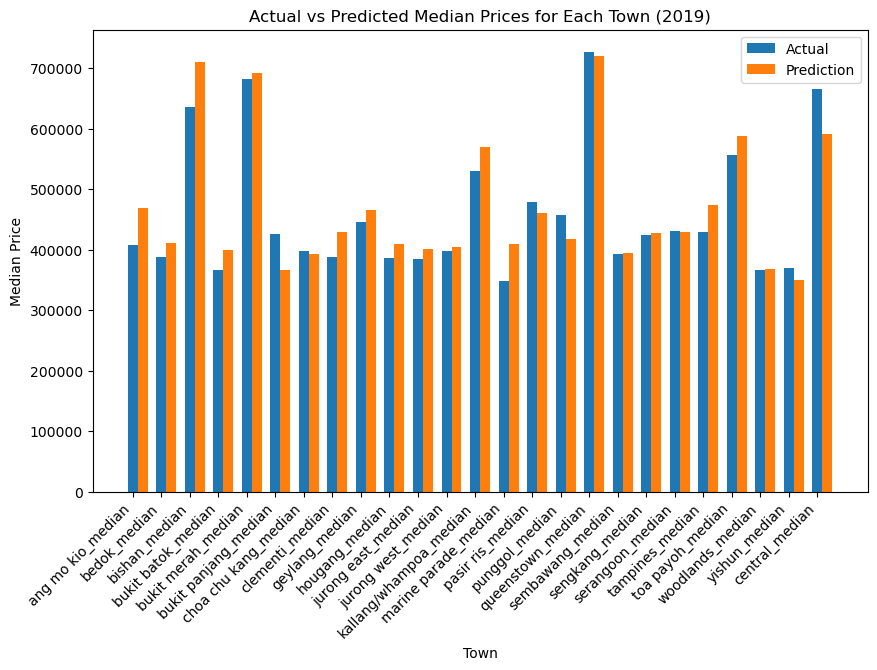

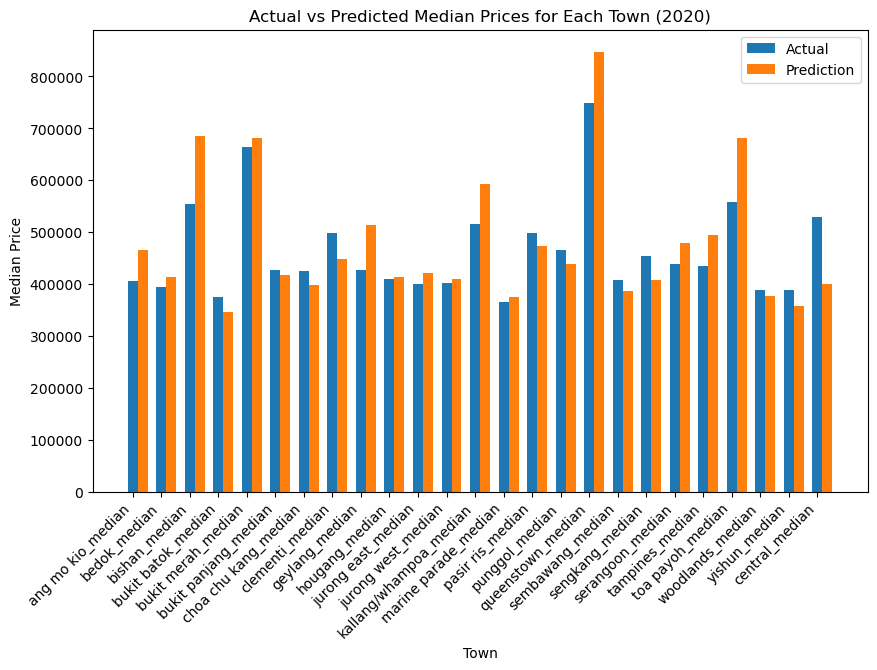

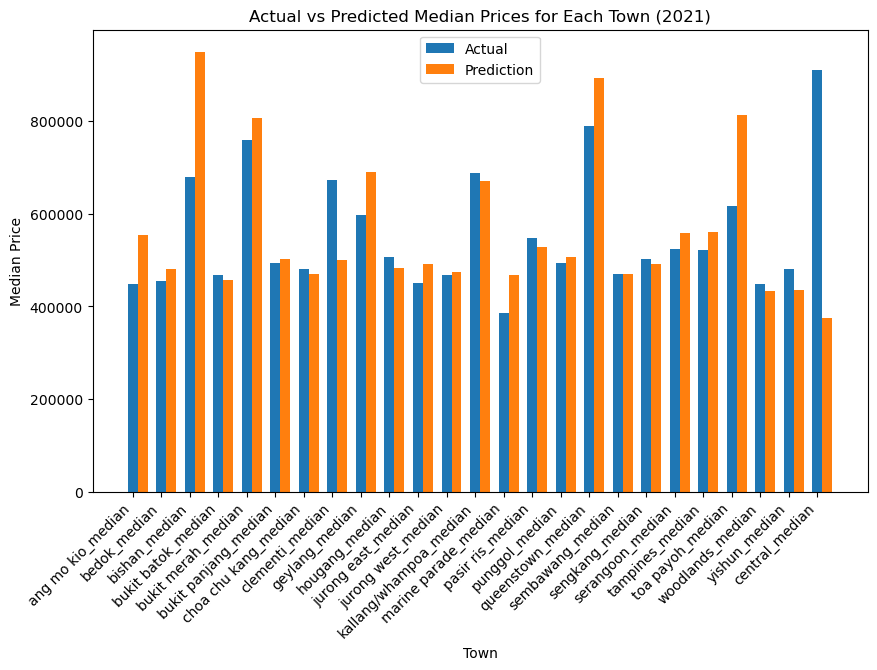

In [107]:
# Extract relevant columns for plotting
town_columns = ["ang mo kio_median", "bedok_median", "bishan_median", "bukit batok_median", "bukit merah_median",
                "bukit panjang_median", "choa chu kang_median", "clementi_median", "geylang_median", "hougang_median",
                "jurong east_median", "jurong west_median", "kallang/whampoa_median", "marine parade_median",
                "pasir ris_median", "punggol_median", "queenstown_median", "sembawang_median", "sengkang_median",
                "serangoon_median", "tampines_median", "toa payoh_median", "woodlands_median", "yishun_median", "central_median"]

prediction_columns = [col for col in test_data_x.columns if col.endswith("_prediction")]

# Prepare data for plotting
years = test_data_x["Year"]

bar_width = 0.35
bar_positions_actual = np.arange(len(town_columns))
bar_positions_predicted = [pos + bar_width for pos in bar_positions_actual]

# Loop through each year to create grouped bar chart
for i, year in enumerate(years):
    actual_values = test_data_x.loc[test_data_x["Year"] == year, town_columns].values.flatten()
    predicted_values = test_data_x.loc[test_data_x["Year"] == year, prediction_columns].values.flatten()

    plt.figure(figsize=(10, 6))
    plt.bar(bar_positions_actual, actual_values, width=bar_width, label="Actual")
    plt.bar(bar_positions_predicted, predicted_values, width=bar_width, label="Prediction")

    plt.title(f"Actual vs Predicted Median Prices for Each Town ({year})")
    plt.xlabel("Town")
    plt.ylabel("Median Price")
    plt.xticks(bar_positions_actual, town_columns, rotation=45, ha="right")
    plt.legend()
    plt.show()


**Actual vs Predicted Median Prices for Each Town Graph** 

I plotted the graph for each year so that it is clear to visualise the difference between each town and their actual and predicted prices. The model has been able to accurately predict the prices for the majority of towns however, there are a few outliers such as Bishan, Central and Toa Payoh. 

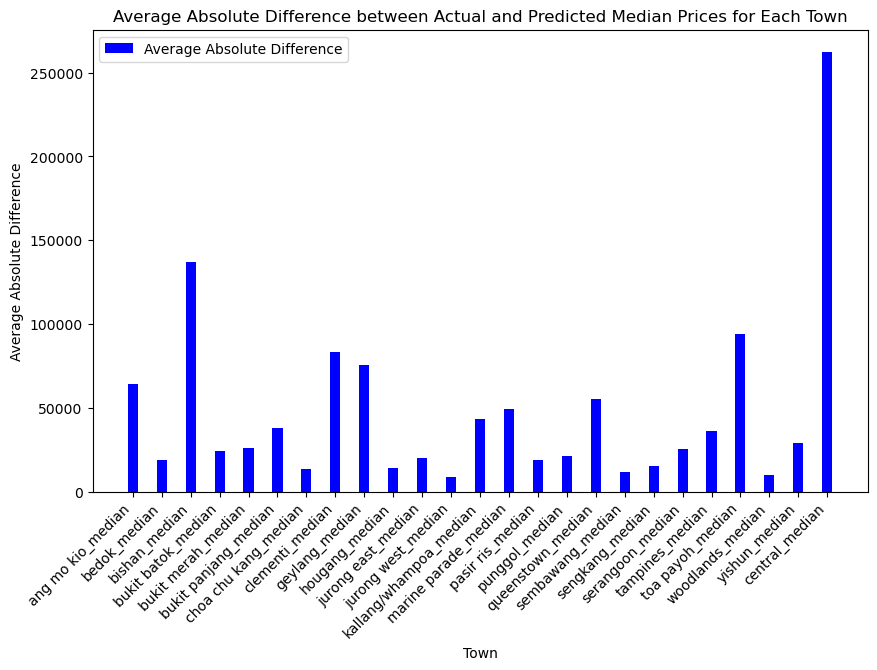

In [108]:
# Extract relevant columns for plotting
town_columns = ["ang mo kio_median", "bedok_median", "bishan_median", "bukit batok_median", "bukit merah_median",
                "bukit panjang_median", "choa chu kang_median", "clementi_median", "geylang_median",
                "hougang_median","jurong east_median", "jurong west_median", "kallang/whampoa_median",
                "marine parade_median","pasir ris_median", "punggol_median", "queenstown_median", 
                "sembawang_median", "sengkang_median", "serangoon_median", "tampines_median", 
                "toa payoh_median", "woodlands_median", "yishun_median", "central_median"]

prediction_columns = [col for col in test_data_x.columns if col.endswith("_prediction")]

# Calculate the absolute differences between actual and predicted values
absolute_differences = np.abs(test_data_x[town_columns].values - test_data_x[prediction_columns].values)

# Calculate the average absolute difference for each town
average_absolute_difference = np.mean(absolute_differences, axis=0)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(town_columns))
bar_width = 0.35

plt.bar(bar_positions, average_absolute_difference, width=bar_width, label="Average Absolute Difference", color='blue')

plt.title("Average Absolute Difference between Actual and Predicted Median Prices for Each Town")
plt.xlabel("Town")
plt.ylabel("Average Absolute Difference")
plt.xticks(bar_positions, town_columns, rotation=45, ha="right")
plt.legend()
plt.show()


**Average Absolute Difference between Actual and Predicted Median Prices for Each Town Graph**

From this graph we can see that the model has been relatively sucessfully in predicting each towns median yearly price. However, we can see that the prices for Bishan, Central and Toa Payoh is not the most representative of the actual prices. However, I do think the model has been accurate to a degree as the prices for the years which we covered previously did show that the median prices for Bishan and the Central did fluctuate the most in comparison to the other towns over the years.

#### Predicting Town's Yearly Median: Data Evaluation

In [109]:
# Extract relevant columns for calculating RMSE
actual_columns = ["ang mo kio_median", "bedok_median", "bishan_median", "bukit batok_median", "bukit merah_median",
                "bukit panjang_median", "choa chu kang_median", "clementi_median", "geylang_median", 
                  "hougang_median", "jurong east_median", "jurong west_median", "kallang/whampoa_median",
                  "marine parade_median", "pasir ris_median", "punggol_median", "queenstown_median", 
                  "sembawang_median", "sengkang_median", "serangoon_median", "tampines_median",
                  "toa payoh_median", "woodlands_median", "yishun_median", "central_median"]

predicted_columns = [f"{town}_prediction" for town in town_columns]

# Calculate squared differences
squared_diff = (test_data_x[actual_columns] - test_data_x[predicted_columns])**2

# Calculate mean squared differences for each town
mse_per_town = squared_diff.mean()

# Calculate RMSE for each town
rmse_per_town = np.sqrt(mse_per_town)

# Calculate overall RMSE
overall_rmse = np.sqrt(mean_squared_error(test_data_x[actual_columns], test_data_x[predicted_columns]))
print("\nRMSE:", overall_rmse)


RMSE: 85721.92041240093


In [110]:
town_yearly_prediction_median_df.describe()

,Year,yearly_median_price,ang mo kio_median,bedok_median,bishan_median,bukit batok_median,bukit merah_median,bukit panjang_median,choa chu kang_median,clementi_median,...,sengkang_median,serangoon_median,tampines_median,toa payoh_median,woodlands_median,yishun_median,central_median,GDP Real Estate,GDP Ownership Of Dwellings,GDP per Capita
count,15.000000,15.000000,15.00000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2014.000000,424040.000000,417930.00000,392930.000000,551310.00000,398406.666667,601593.333333,399213.333333,411260.000000,433563.333333,...,446423.333333,415986.666667,444493.333333,506710.000000,375133.333333,355833.333333,525293.333333,15424.533333,15415.600000,0.075152
std,4.472136,57051.778487,59433.45859,54734.703669,99131.14726,40121.907387,104213.775595,71708.635330,50677.528128,83214.682484,...,57298.650154,64302.123012,60915.312603,86521.139448,51173.450380,64425.667763,204001.128206,3003.310718,3706.208956,0.013760
min,2007.000000,293000.000000,280000.00000,257000.000000,370250.00000,331900.000000,396500.000000,249000.000000,291900.000000,302200.000000,...,316000.000000,275500.000000,301500.000000,337500.000000,263000.000000,218000.000000,300000.000000,9360.000000,7943.000000,0.056606
25%,2010.500000,417500.000000,401975.00000,385750.000000,517500.00000,371225.000000,552375.000000,359150.000000,395750.000000,389000.000000,...,431200.000000,390650.000000,422500.000000,436125.000000,362000.000000,339250.000000,392500.000000,13822.000000,12475.500000,0.066095
50%,2014.000000,435000.000000,446000.00000,410000.000000,551500.00000,400000.000000,627500.000000,415950.000000,415000.000000,428750.000000,...,452500.000000,431500.000000,461150.000000,537500.000000,379000.000000,367000.000000,437500.000000,16127.000000,17436.000000,0.072937
75%,2017.500000,445000.000000,456500.00000,424000.000000,648750.00000,429500.000000,668975.000000,443250.000000,437125.000000,436875.000000,...,482450.000000,459875.000000,477750.000000,569375.000000,405250.000000,383250.000000,642500.000000,17244.000000,17948.500000,0.084503
max,2021.000000,515900.000000,486500.00000,454200.000000,678750.00000,468000.000000,760000.000000,494000.000000,485000.000000,673250.000000,...,532000.000000,524900.000000,521500.000000,617200.000000,447500.000000,482000.000000,910000.000000,19243.000000,18912.000000,0.104402


In [111]:
actual_columns = [ 'ang mo kio_median', 'bedok_median',
                   'bishan_median', 'bukit batok_median', 'bukit merah_median',
                   'bukit panjang_median', 'choa chu kang_median', 'clementi_median',
                   'geylang_median', 'hougang_median', 'jurong east_median',
                   'jurong west_median', 'kallang/whampoa_median', 'marine parade_median',
                   'pasir ris_median', 'punggol_median', 'queenstown_median',
                   'sembawang_median', 'sengkang_median', 'serangoon_median',
                   'tampines_median', 'toa payoh_median', 'woodlands_median',
                   'yishun_median', 'central_median']

predicted_columns = ['ang mo kio_median_prediction', 'bedok_median_prediction',
                       'bishan_median_prediction', 'bukit batok_median_prediction',
                       'bukit merah_median_prediction', 'bukit panjang_median_prediction',
                       'choa chu kang_median_prediction', 'clementi_median_prediction',
                       'geylang_median_prediction', 'hougang_median_prediction',
                       'jurong east_median_prediction', 'jurong west_median_prediction',
                       'kallang/whampoa_median_prediction', 'marine parade_median_prediction',
                       'pasir ris_median_prediction', 'punggol_median_prediction',
                       'queenstown_median_prediction', 'sembawang_median_prediction',
                       'sengkang_median_prediction', 'serangoon_median_prediction',
                       'tampines_median_prediction', 'toa payoh_median_prediction',
                        'woodlands_median_prediction', 'yishun_median_prediction',
                       'central_median_prediction']

# Calculate MAE for predictions of each town
mae_values = np.abs(test_data_x[actual_columns].values - test_data_x[predicted_columns].values).mean()

# Print the overall MAE for the predictions of the towns
print("Mean Absolute Error (MAE) for Predictions:", mae_values)

Mean Absolute Error (MAE) for Predictions: 47919.39


In [117]:
# Calculate MAE for each town
mae_values_per_town = np.abs(test_data_x[actual_columns].values - test_data_x[predicted_columns].values).mean(axis=0)

# Create a DataFrame mae_df to display the results
mae_df = pd.DataFrame({'Town': actual_columns, 'MAE': mae_values_per_town})

# Print or display the MAE values for each town
print("MAE for Each Town:", mae_df)

MAE for Each Town:                       Town        MAE
0        ang mo kio_median   64105.25
1             bedok_median   18974.25
2            bishan_median  136763.75
3       bukit batok_median   24001.25
4       bukit merah_median   26231.50
5     bukit panjang_median   37864.50
6     choa chu kang_median   13414.50
7          clementi_median   83288.00
8           geylang_median   75785.25
9           hougang_median   14394.75
10      jurong east_median   20253.50
11      jurong west_median    8976.75
12  kallang/whampoa_median   43573.50
13    marine parade_median   49520.50
14        pasir ris_median   19019.50
15          punggol_median   21437.50
16       queenstown_median   55032.75
17        sembawang_median   11623.50
18         sengkang_median   15476.50
19        serangoon_median   25566.00
20         tampines_median   36437.50
21        toa payoh_median   94316.25
22        woodlands_median   10174.50
23           yishun_median   29299.00
24          central_median  262

In [113]:
standard_deviation_values = np.std(test_data_x[predicted_columns], axis=0)

# Print the standard deviation values for each column
for column, std_value in zip(predicted_columns, standard_deviation_values):
    print(f"Standard Deviation of {column}: {std_value}")

Standard Deviation of ang mo kio_median_prediction: 36491.34716186154
Standard Deviation of bedok_median_prediction: 28840.16478259963
Standard Deviation of bishan_median_prediction: 105559.48031175362
Standard Deviation of bukit batok_median_prediction: 39495.342727814124
Standard Deviation of bukit merah_median_prediction: 51913.42326893884
Standard Deviation of bukit panjang_median_prediction: 52202.57807330975
Standard Deviation of choa chu kang_median_prediction: 31239.1548101097
Standard Deviation of clementi_median_prediction: 27547.87053476185
Standard Deviation of geylang_median_prediction: 88023.17108686497
Standard Deviation of hougang_median_prediction: 30460.3023325032
Standard Deviation of jurong east_median_prediction: 35652.03884071709
Standard Deviation of jurong west_median_prediction: 28597.339993214402
Standard Deviation of kallang/whampoa_median_prediction: 41081.7867734596
Standard Deviation of marine parade_median_prediction: 32880.940851046216
Standard Deviation

**Evaluation: Towns Yearly Median - Mean Absolute Error (MAE)**

In order to evaluate the performance of the model to predict the future towns' yearly median across all flat types, I used the Mean Absolute Error (MAE) to find how effective the model has been in predicting each towns' yearly median price in comparison to the actual towns' median prices. From the results, we can observe that the accuracy of the predictions varies across the towns. For example, the towns Bukit Merah and Choa Chu Kang have relatively low MAE values. Therefore, implying that the model has been able to predict the towns' median prices and it aligns closely to the actual median prices. However, for the towns Bishan and the Central, there is a relatively higher MAE value, which suggests that the models' predictions exhibits larger absolute errors. 
Overall, the comparison of MAE values across the towns allows for much more targeted refinement of the model which will improve the prediction accuracy. 

## Conclusion 

From the obtained results of both models, predicting the yearly median prices and the towns' median yearly prices, it can be concluded that the machine learning multiple linear regression model was successful in both scenarios. The prediction of the yearly median prices demonstrated a high level of accuracy, closely aligning with the actual yearly median values. This success can be attributed to the significant impact of the identified factors, including GDP, population, and the number of transactions, which played a pivotal role in training the model.

However, when predicting the towns' yearly median prices, the model exhibited success for most towns but faced challenges in accurately forecasting a few. This discrepancy may stem from insufficient historical data for certain towns, particularly over an extended period. It is essential to acknowledge that factors beyond those considered in this project, such as unforeseen events like a pandemic or upcoming government projects, could influence town-specific median prices. For instance, the addition of a new Mass Rapid Transport (MRT) line, Cross Island Line which will across Singapore could significantly impact property prices in specific towns. [5] 
To enhance the model's accuracy, future iterations could incorporate additional variables, including upcoming developmental projects and external events. This would provide a more comprehensive understanding of the dynamic factors influencing town-specific median prices.

The predictive models generated from this project can offer valuable insights for individuals interested in purchasing resale properties, especially those seeking to compare prices across different towns. Given the desirability of resale markets in well-established and matured estates in Singapore, these models can aid potential buyers in making informed decisions.

Moreover, the developed solution has the potential to be adapted for predicting prices in other real estate markets, such as rental prices in new building projects. By extending the model's application to diverse scenarios, it can serve as a valuable tool for individuals and organizations involved in real estate planning, investment, and decision-making.

## References

[1] 
https://www.hdb.gov.sg/business/estate-agents-and-salespersons/buying-a-resale-flat/procedures

[2]
https://www.singstat.gov.sg/find-data

[3] 
https://beta.data.gov.sg. 

[4] 
https://www.nlb.gov.sg/main/article-detail?cmsuuid=d66bfa02-aef8-44a1-a07f-9e1d79a084e1#:~:text=The%20Housing%20and%20Urban%20Development,could%20not%20afford%20private%20homes

[5]  
https://www.lta.gov.sg/content/ltagov/en/upcoming_projects/rail_expansion/cross_island_line.html